# init

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # for XGBoost
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 

from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
from catboost                import CatBoostClassifier
from sklearn.linear_model    import LogisticRegression

from sklearn                 import datasets
from sklearn.model_selection import train_test_split
from copy                    import copy
from umap                    import UMAP


In [3]:
# import domestic lib
import ppap.tabular_utility        as ppap_tab_utl
import ppap.tabular_classification as ppap_tab_cls

import importlib
importlib.reload(ppap_tab_utl)
importlib.reload(ppap_tab_cls)


<module 'ppap.tabular_classification' from '/Users/mucunwuxian/MICIN/20190709_houken_x_PPAP/PPAP/ppap/tabular_classification.py'>

# Pre-Process

In [4]:
# load sample data from sklearn
iris_data   = datasets.load_iris()
column_name = iris_data.feature_names

# 
column_name = np.array(column_name)

# prepare X and y
X = iris_data.data.astype('float32')
y = iris_data.target.astype('int32')

# print size of X and y
print('np.shape(X)  = (%d, %d)' % np.shape(X))
print('np.shape(y)  = (%d)'     % np.shape(y))
print('np.unique(y) = %s'       % np.unique(y))


np.shape(X)  = (150, 4)
np.shape(y)  = (150)
np.unique(y) = [0 1 2]


In [5]:
# [STEP 1]
# check nan ratio (vertical)
print('check for X')
ppap_tab_utl.check_nan_ratio_vert(X           = X, 
                                  column_name = column_name)
print('')

print('check for y')
ppap_tab_utl.check_nan_ratio_vert(X           = y, 
                                  column_name = 'target')


check for X

include nan column is ...

------------------------------------------------------------
nan is not exist. check OK!

check for y

include nan column is ...

------------------------------------------------------------
nan is not exist. check OK!


array([0.])

In [6]:
# [STEP 2]
# check nan ratio (horizontal)
print('check for X')
ppap_tab_utl.check_nan_ratio_horz(X = X)
print('')


check for X
nan is not exist. check OK!



In [7]:
# [STEP 3-1]
# value state check (of X)
ppap_tab_utl.check_value_count(X           = X, 
                               column_name = column_name)



numeric ratio is ...

------------------------------------------------------------
  - sepal length (cm) -> 1.00000
  - sepal width (cm) -> 1.00000
  - petal length (cm) -> 1.00000
  - petal width (cm) -> 1.00000



value pattern is ...

------------------------------------------------------------
[sepal length (cm)]
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
6.4     7
5.8     7
6.0     6
5.6     6
6.1     6
5.4     6
4.9     6
6.5     5
4.8     5
5.2     4
4.6     4
6.9     4
6.2     4
7.7     4
4.4     3
5.9     3
6.8     3
7.2     3
4.7     2
6.6     2
7.9     1
7.3     1
7.4     1
7.1     1
7.6     1
4.3     1
5.3     1
7.0     1
4.5     1
dtype: int64

------------------------------------------------------------
[sepal width (cm)]
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.8     6
3.3     6
3.5     6
2.6     5
3.6     4
2.3     4
3.7     3
2.4     3
2.2     3
3.9     2
4.1     1
2.0     1
4.0     1
4.4     1
4.2     1
dtype:

In [8]:
# [STEP 3-2]
# value state check (of y)
ppap_tab_utl.check_value_count(X           = y, 
                               column_name = 'target_name')



numeric ratio is ...

------------------------------------------------------------
  - target_name -> 1.00000



value pattern is ...

------------------------------------------------------------
[target_name]
2    50
1    50
0    50
dtype: int64


In [9]:
# [STEP 4]
# organize data

# before
print('\nbefore organize shape is (%d, %d)' % np.shape(X))

# exec
X = ppap_tab_utl.organize_data(X           = X, 
                               column_name = column_name)

# after
print('\nafter organize shape is (%d, %d)' % np.shape(X))

# for visualize
df_X_tmp = pd.DataFrame(X, columns=column_name)
df_X_tmp.head(10)



before organize shape is (150, 4)

delete one-pattern column...
  - none ...

delete overlap column...
  - none ...

after organize shape is (150, 4)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1

Total data num    :    150件
Total data num    :    150件
class 0 data num :     50件 (33.33%)
class 1 data num :     50件 (33.33%)
class 2 data num :     50件 (33.33%)


class 0
leakage check


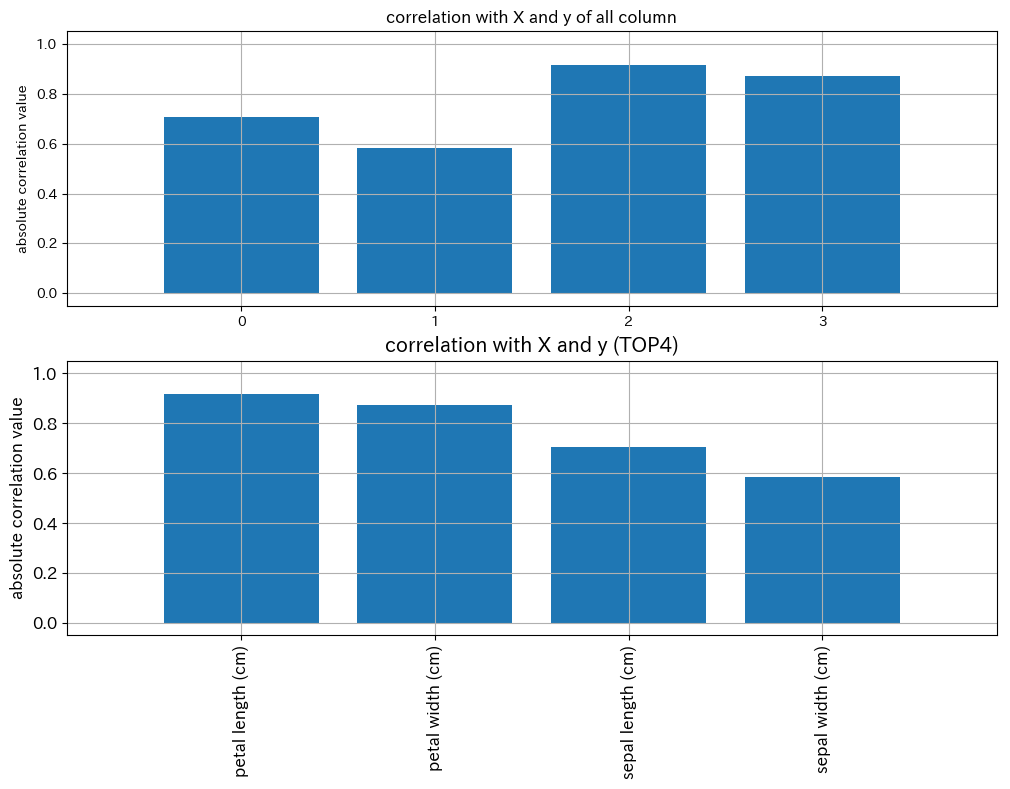



class 1
leakage check


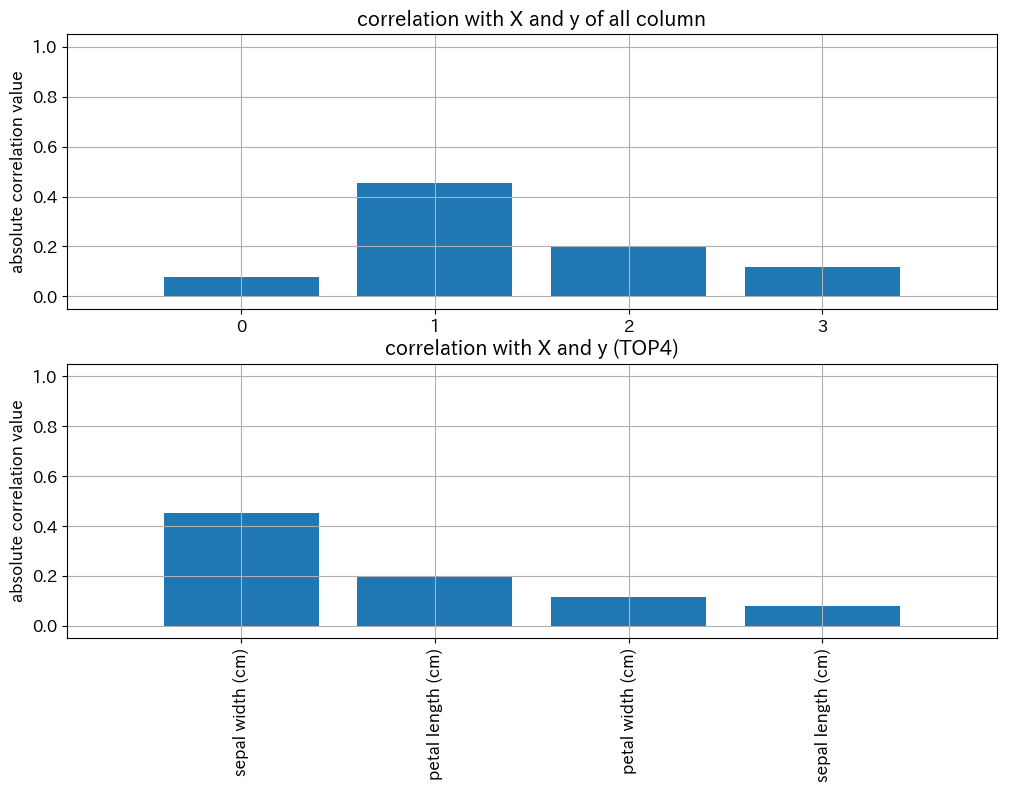



class 2
leakage check


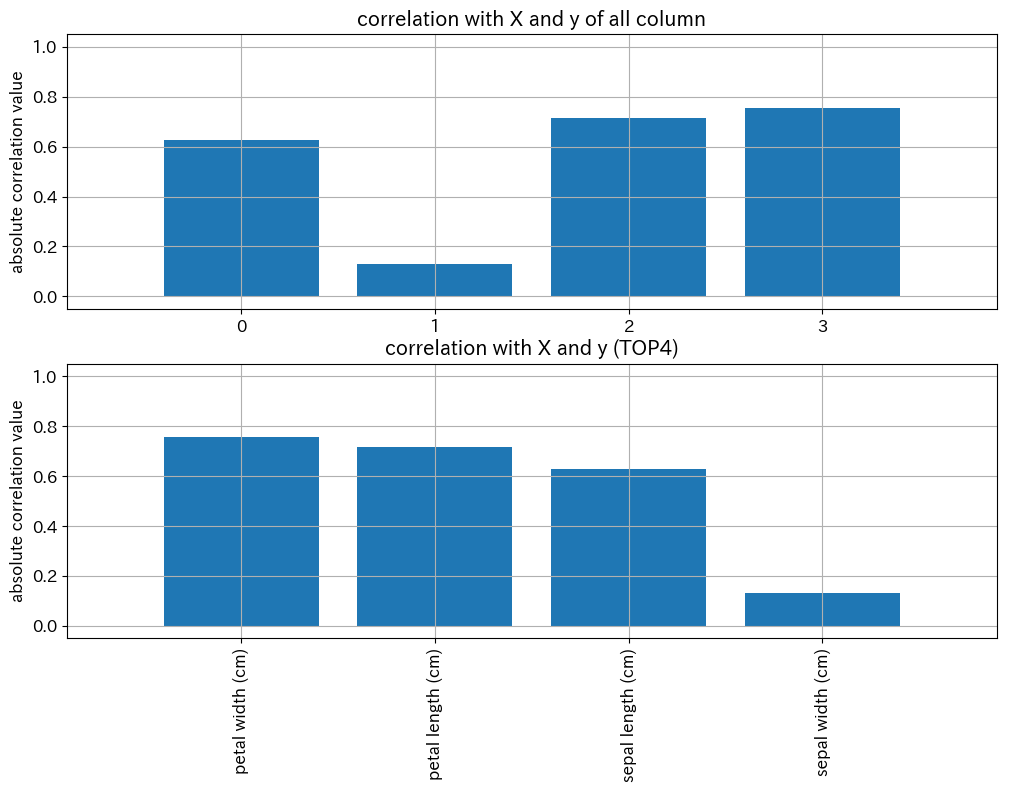



cross plot
---------------------------------------------
[3]


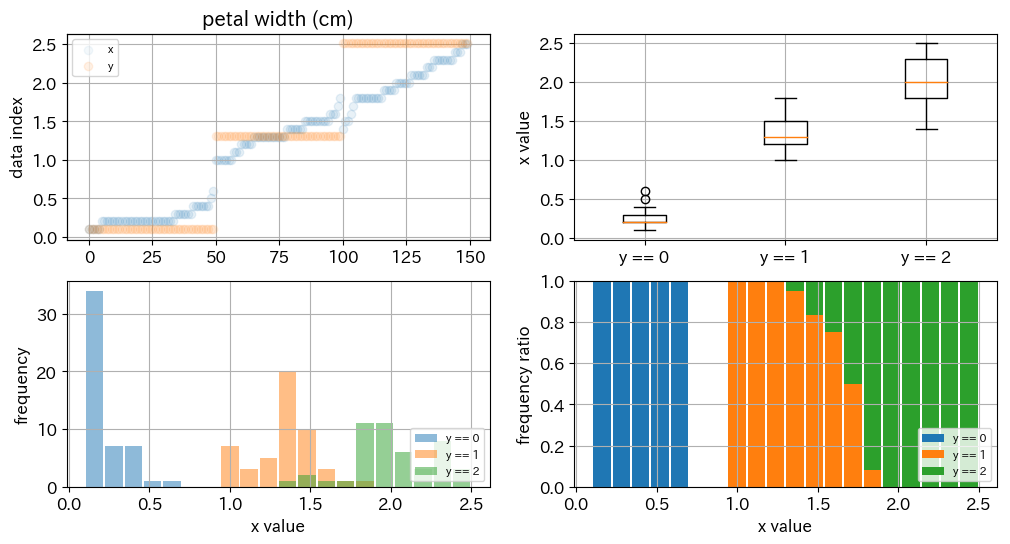



---------------------------------------------
[2]


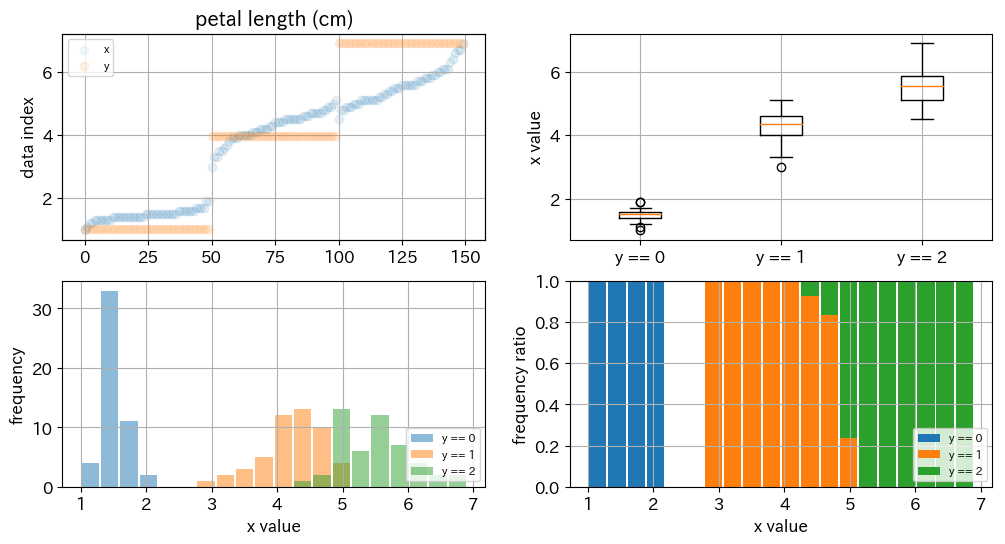



---------------------------------------------
[0]


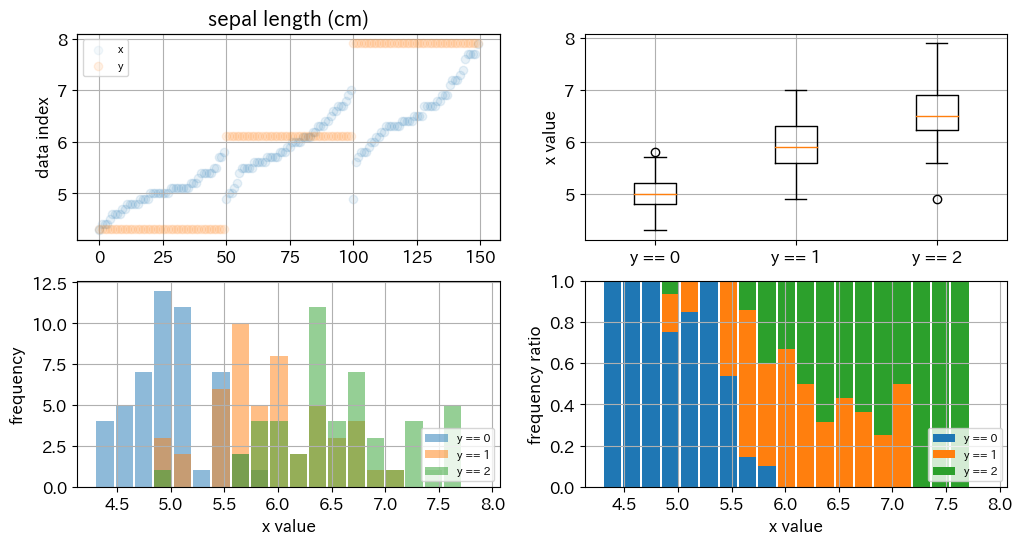



---------------------------------------------
[1]


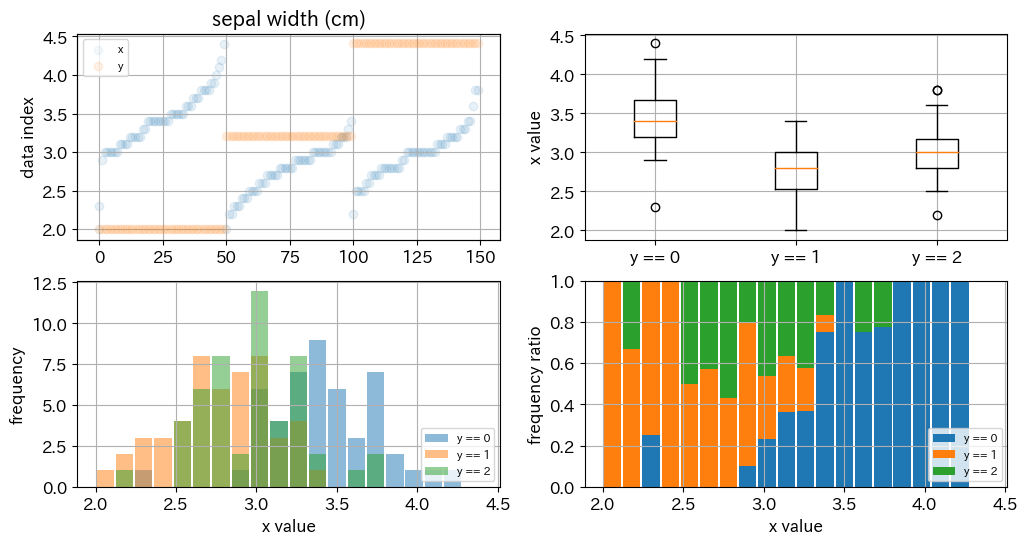

array([[0.70532929, 0.58432523, 0.91540736, 0.87112714],
       [0.07805792, 0.45295713, 0.20014568, 0.11574417],
       [0.62727137, 0.1313681 , 0.71526167, 0.75538297]])

In [10]:
# [STEP 5]
# check leakage and predictability
ppap_tab_utl.check_X_and_y_status(X           = X, 
                                  y           = y, 
                                  column_name = column_name)


2dim visualization


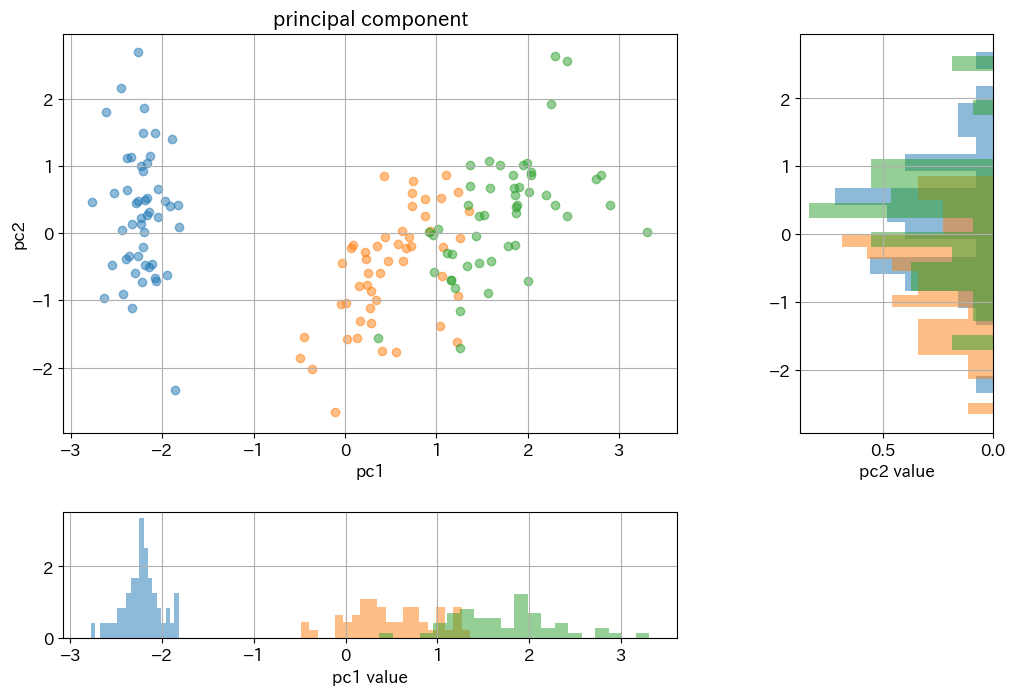

2dim visualization


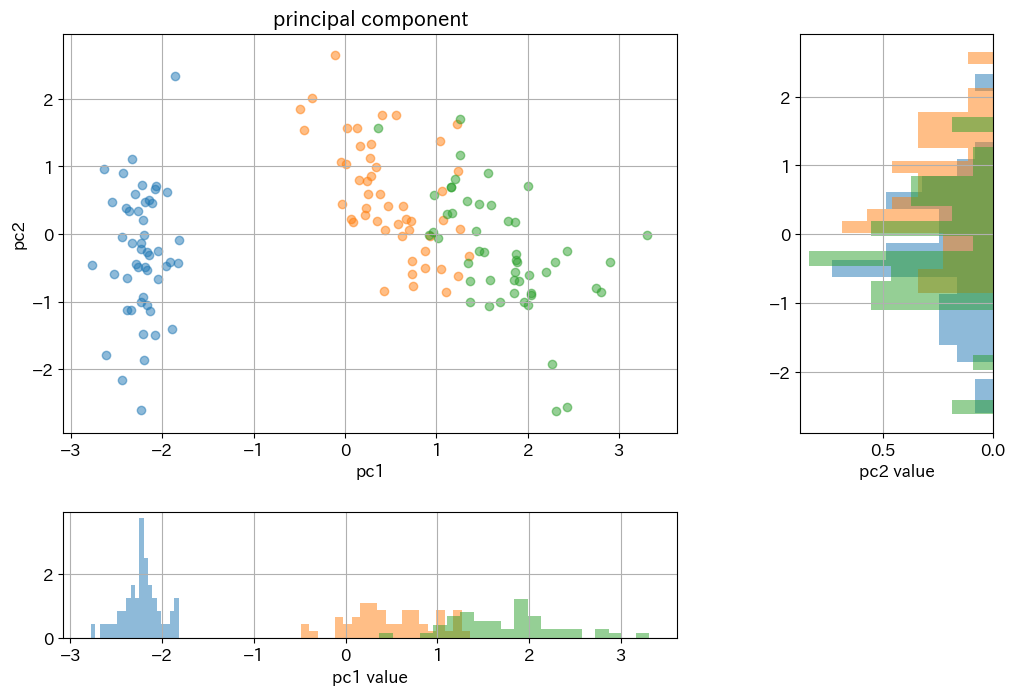

In [11]:
# [STEP 6-1]
# visualize on PCA
_, _, _ = ppap_tab_utl.understandable_visualize(X = X, 
                                                y = y)

# visualize on PCA (suppress outlier)
_, _, _ = ppap_tab_utl.understandable_visualize(X              = X, 
                                                y              = y, 
                                                X_outlier_care = True)


2dim visualization


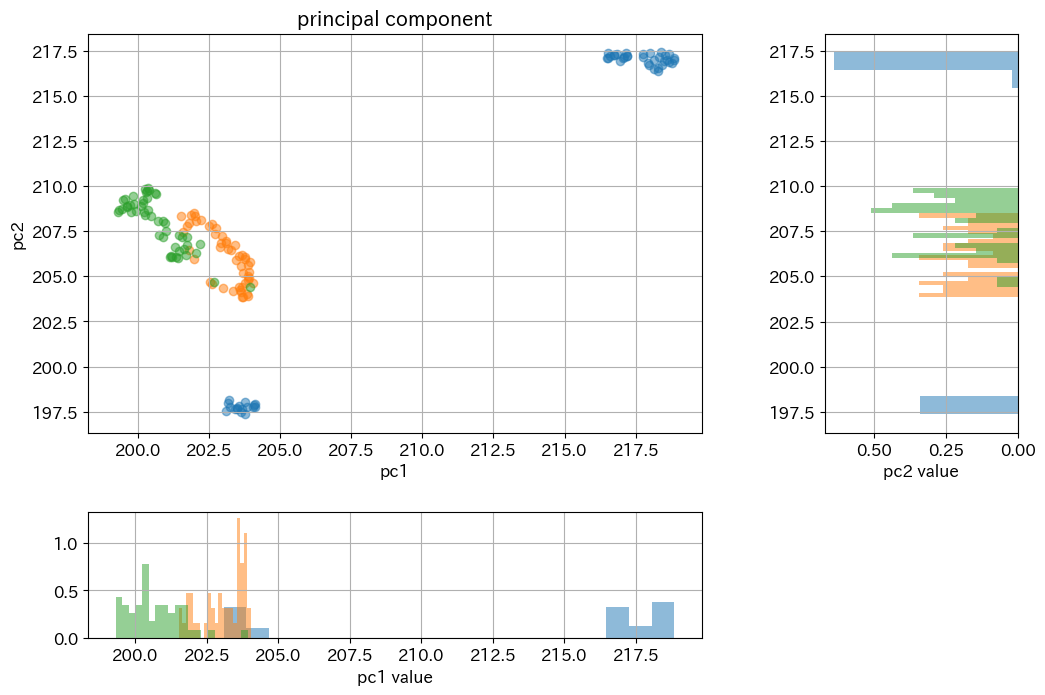

2dim visualization


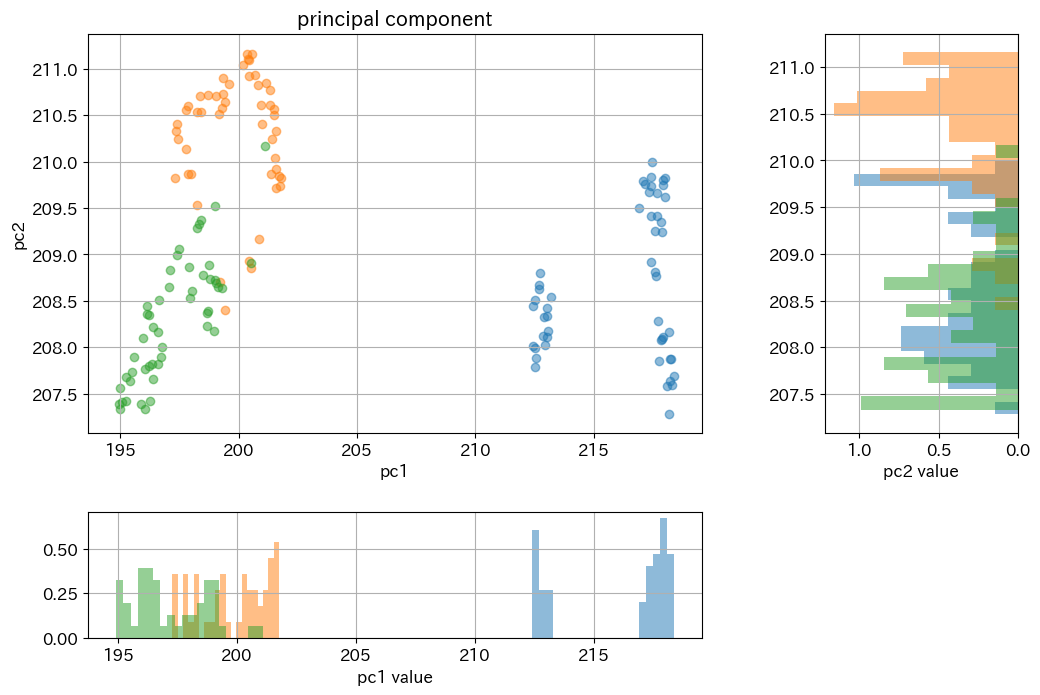

In [12]:
# [STEP 6-2]
# visualize on UMAP
_, _, _ = ppap_tab_utl.understandable_visualize(X     = X, 
                                                y     = y, 
                                                model = UMAP(random_state=0))

# visualize on UMAP (suppress outlier)
_, _, _ = ppap_tab_utl.understandable_visualize(X              = X, 
                                                y              = y,
                                                model          = UMAP(random_state=0),
                                                X_outlier_care = True)


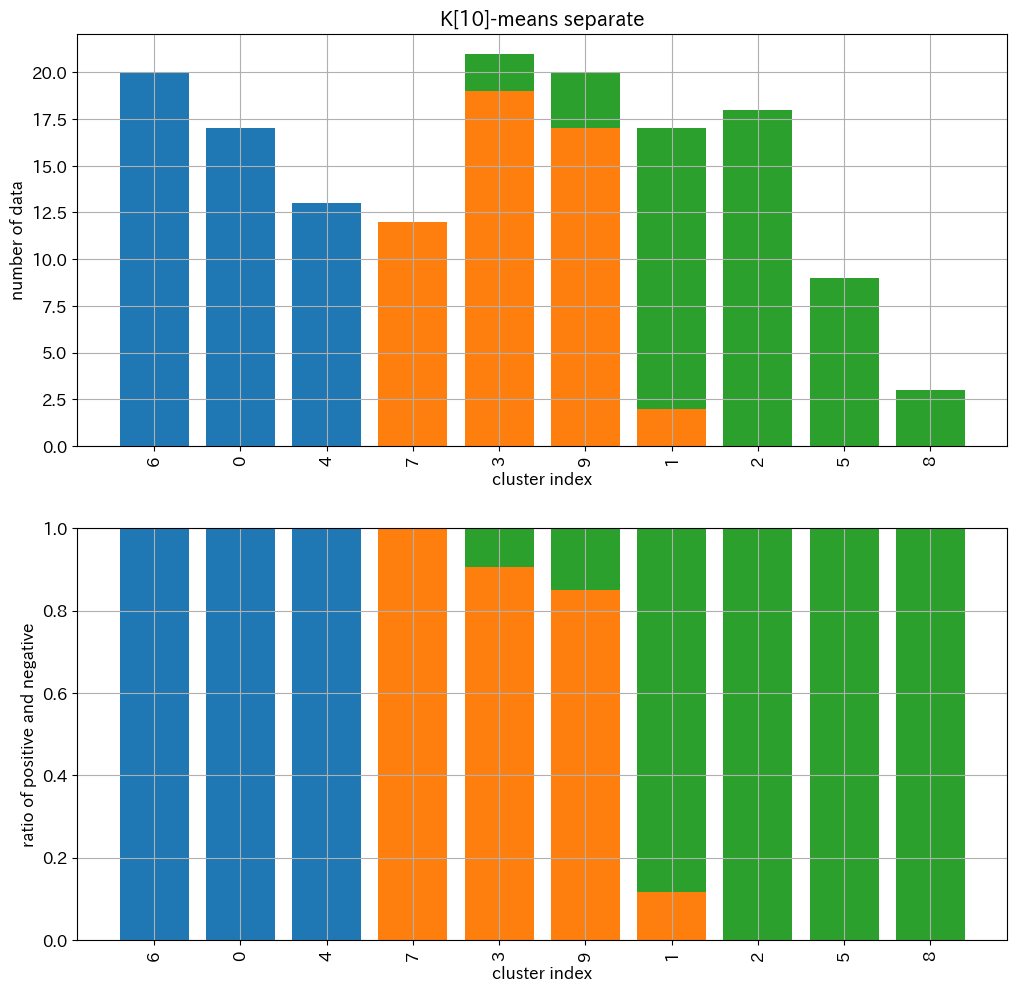

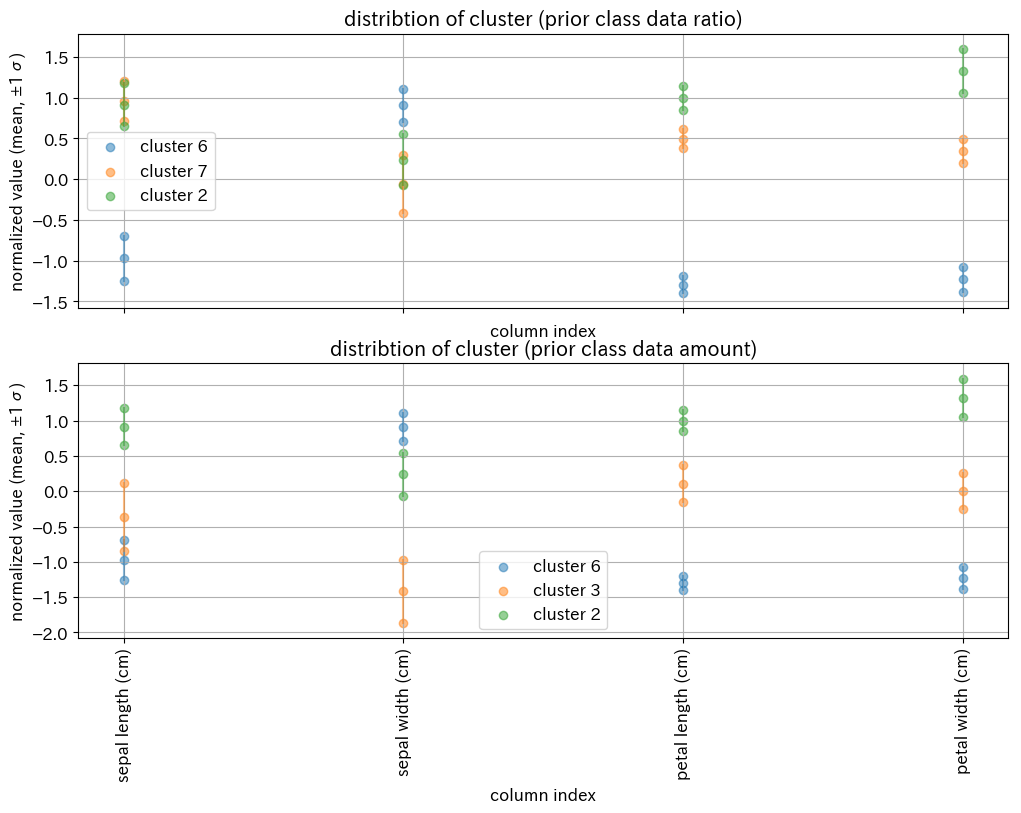

In [13]:
# [STEP 7] 
# judge predictable or not by kmeans
(kmeans_result, 
 _, 
 idx_sort_k) = ppap_tab_utl.kmeans_classification(X              = X, 
                                                  y              = y, 
                                                  column_name    = column_name, 
                                                  X_outlier_care = True)


k-nn searching on positive data [start time is 2019-07-10 13:57:49.967514]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                                [end time is 2019-07-10 13:57:50.355082]



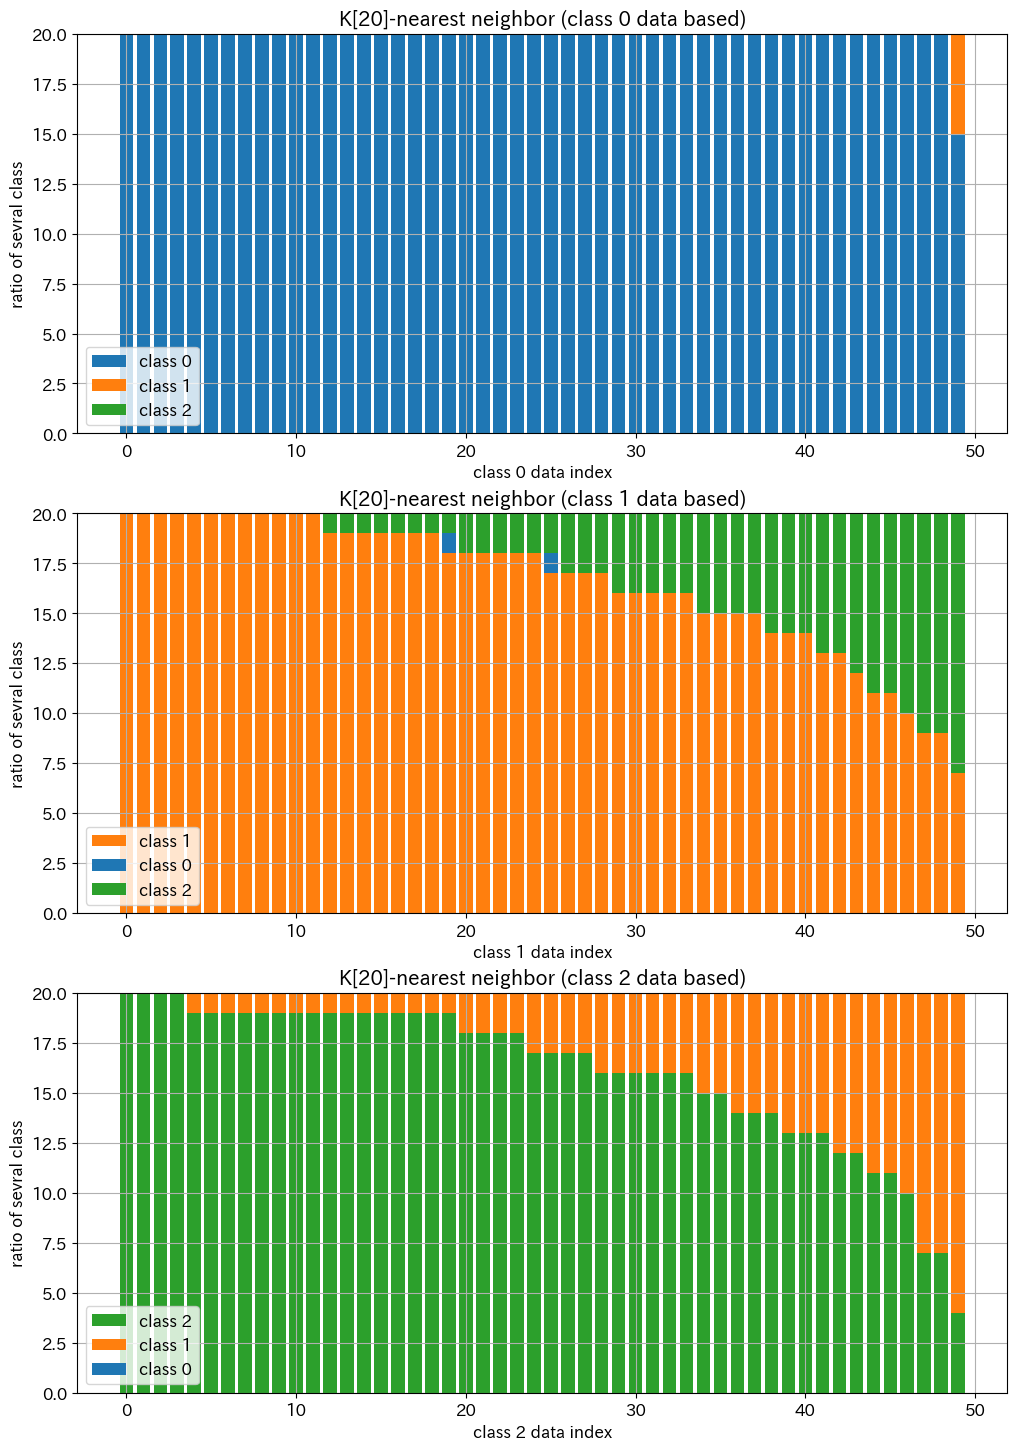

In [14]:
# [STEP 8] 
# judge predictable or not by kmeans
_ = ppap_tab_utl.knn_classification(X              = X, 
                                    y              = y, 
                                    X_outlier_care = False)


k-nn searching on positive data [start time is 2019-07-10 13:57:51.540068]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                                [end time is 2019-07-10 13:57:51.654638]



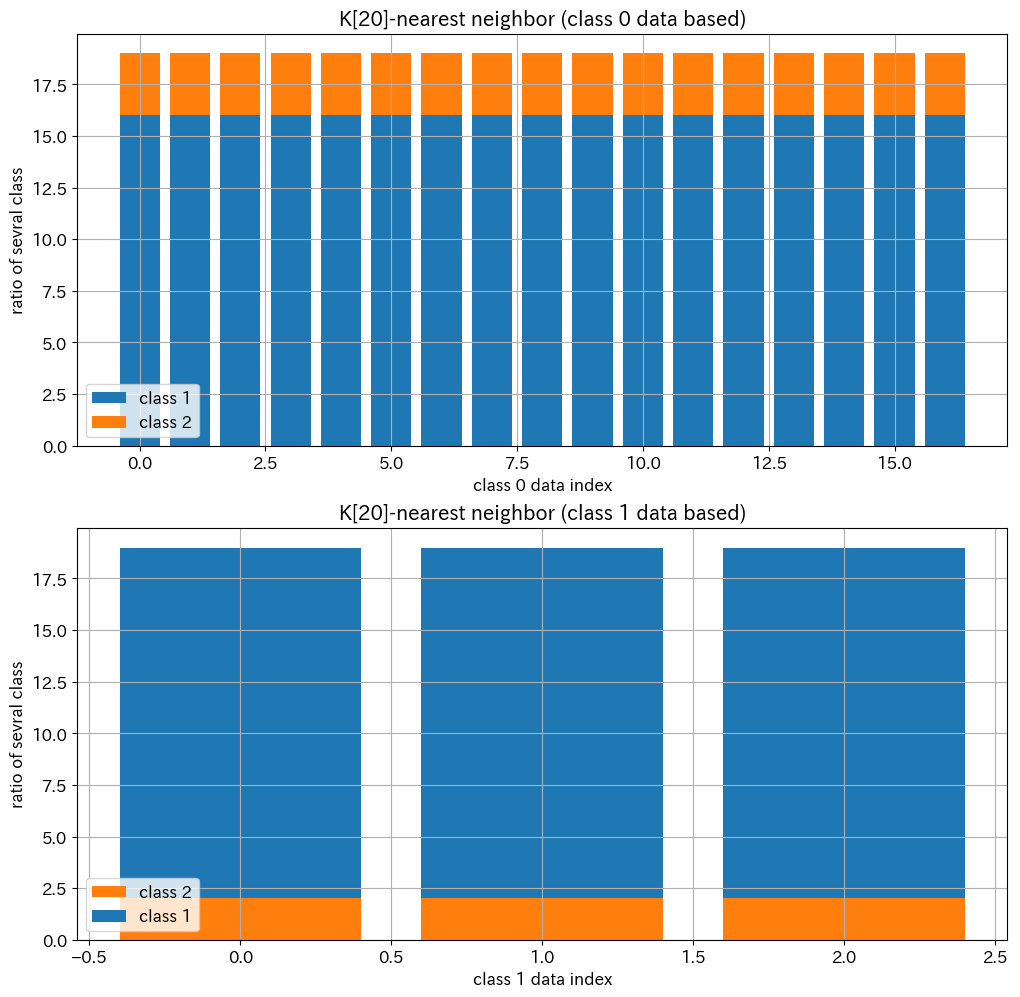

In [15]:
# [STEP 12-2] 
# judge predictable or not by knn
_ = ppap_tab_utl.knn_classification(X              = X[kmeans_result.labels_ == idx_sort_k[5], :], 
                                    y              = y[kmeans_result.labels_ == idx_sort_k[5]], 
                                    X_outlier_care = True)


# Prediction

In [16]:
# separate train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print('np.shape(X_train)  = (%d, %d)' % np.shape(X_train))
print('np.shape(y_train)  = (%d)'     % np.shape(y_train))
print('np.shape(X_test)   = (%d, %d)' % np.shape(X_test))
print('np.shape(y_test)   = (%d)'     % np.shape(y_test))
print('')
print('np.unique(y_train) = %s'       % np.unique(y_train))
print('np.unique(y_test)  = %s'       % np.unique(y_test))


np.shape(X_train)  = (75, 4)
np.shape(y_train)  = (75)
np.shape(X_test)   = (75, 4)
np.shape(y_test)   = (75)

np.unique(y_train) = [0 1 2]
np.unique(y_test)  = [0 1 2]


In [17]:
# [STEP 1-1]
# train and predict by one model 
model = LGBMClassifier(objective     = 'binary',  
                       learning_rate = 0.1, 
                       n_estimators  = 100, 
                       random_state  = 0, 
                       n_jobs        = 4) 
# exec
(model, 
 y_train_hat, 
 y_test_hat, 
 _, 
 _) = ppap_tab_cls.train_and_predict(X_train        = X_train,
                                     y_train        = y_train,
                                     X_test         = X_test,
                                     y_test         = y_test, 
                                     model          = model)
#
print('np.shape(y_train_hat) = (%d, %d)' % np.shape(y_train_hat))
print('np.shape(y_test_hat)  = (%d, %d)' % np.shape(y_test_hat))


np.shape(y_train_hat) = (75, 3)
np.shape(y_test_hat)  = (75, 3)


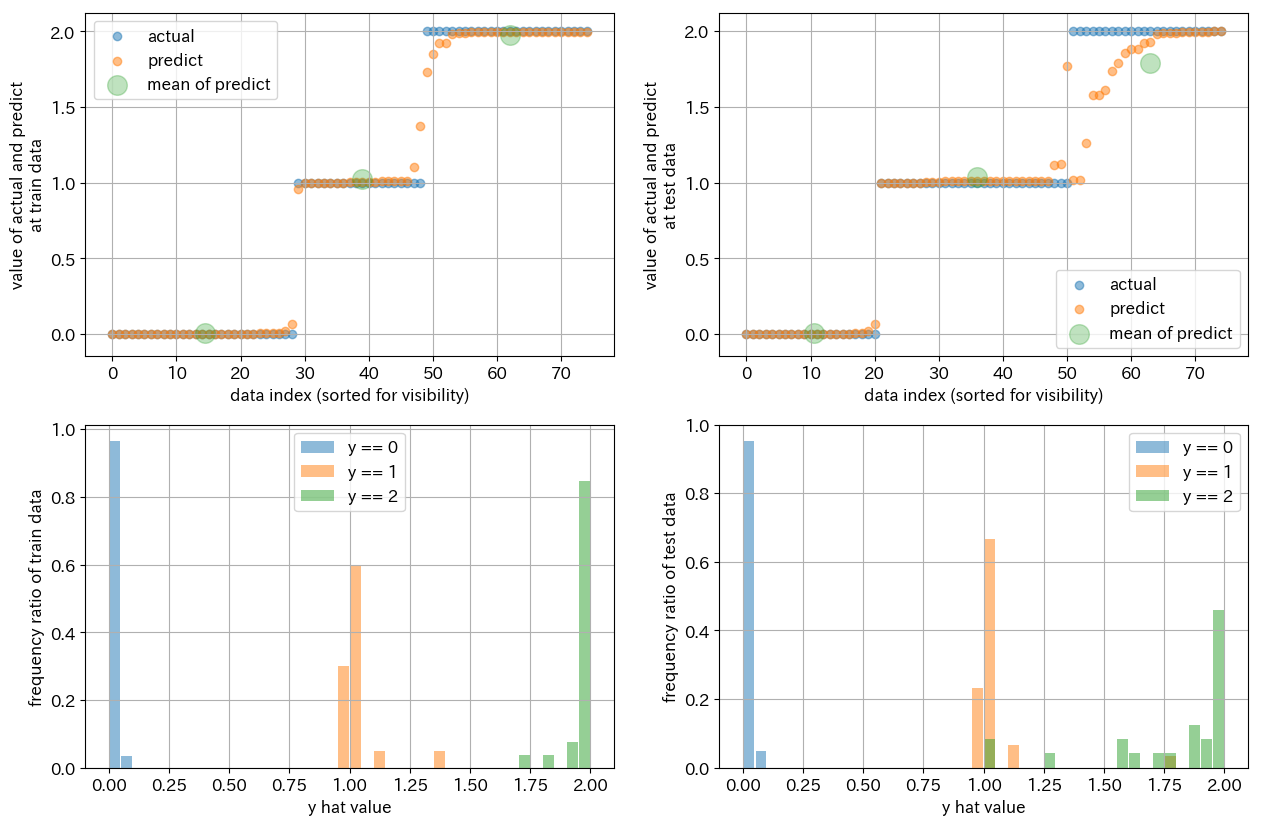

In [18]:
# [STEP 1-2]
# plot
fig = plt.figure(figsize=(15,10),dpi=100)

ax = plt.subplot(2, 2, 1)
ppap_tab_cls.draw_prediction_scat(y_hat     = y_train_hat, 
                                  y         = y_train, 
                                  data_type = 'train', 
                                  alpha     = 0.5)
ax = plt.subplot(2, 2, 2)
ppap_tab_cls.draw_prediction_scat(y_hat     = y_test_hat, 
                                  y         = y_test, 
                                  data_type = 'test', 
                                  alpha     = 0.5)
ax = plt.subplot(2, 2, 3)
ppap_tab_cls.draw_prediction_dist(y_hat     = y_train_hat, 
                                  y         = y_train, 
                                  data_type = 'train')
ax = plt.subplot(2, 2, 4)
ppap_tab_cls.draw_prediction_dist(y_hat     = y_test_hat, 
                                  y         = y_test, 
                                  data_type = 'test')


array([0])

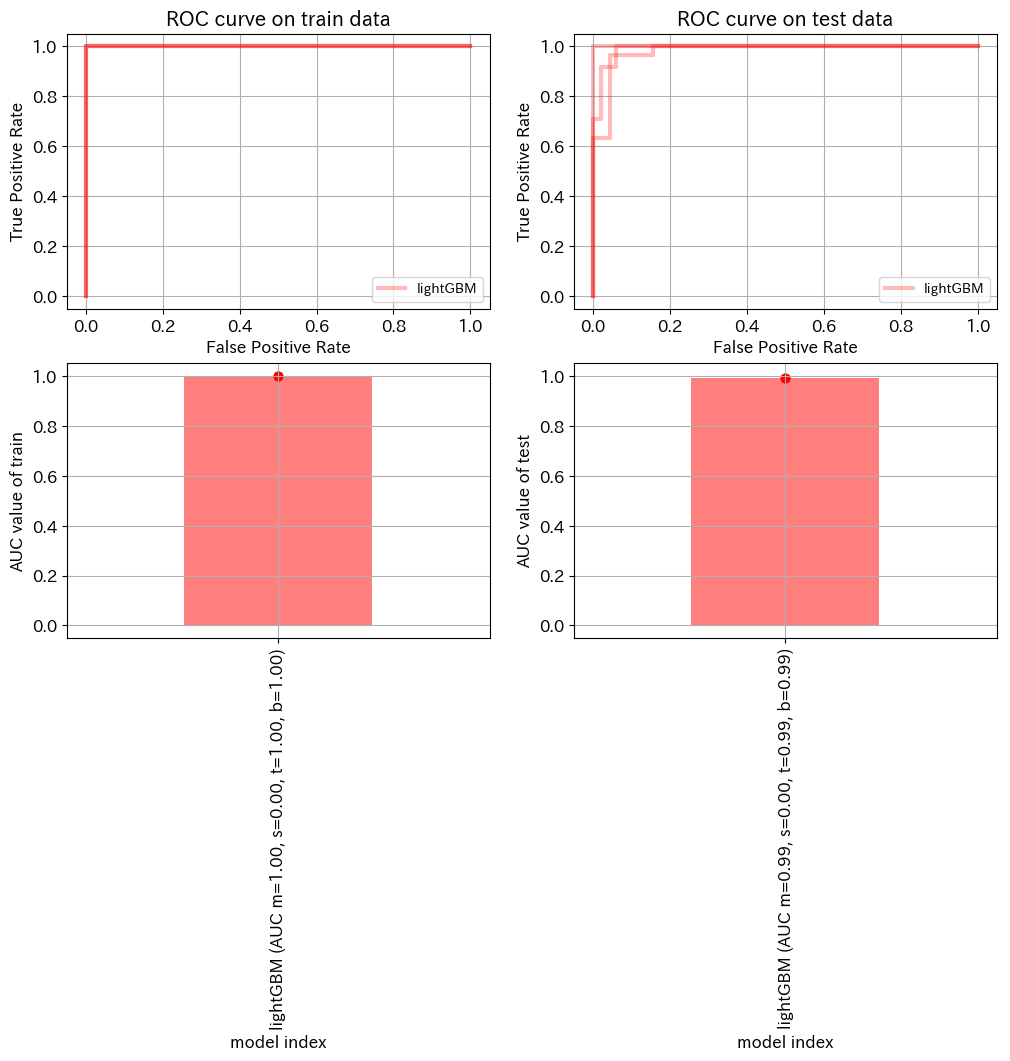

In [19]:
# [STEP 1-3]
# plot
fig = plt.figure(figsize=(12,8),dpi=100)

ax = plt.subplot(2, 2, 1)
auc_train = ppap_tab_cls.draw_roc(y_hat      = y_train_hat, 
                                  y          = y_train, 
                                  model_name = 'lightGBM', 
                                  data_type  = 'train')
ax = plt.subplot(2, 2, 2)
auc_test = ppap_tab_cls.draw_roc(y_hat      = y_test_hat, 
                                 y          = y_test, 
                                 model_name = 'lightGBM', 
                                 data_type  = 'test')
ax = plt.subplot(2, 2, 3)
ppap_tab_cls.draw_auc(auc        = auc_train, 
                      model_name = 'lightGBM', 
                      data_type  = 'train')
ax = plt.subplot(2, 2, 4)
ppap_tab_cls.draw_auc(auc        = auc_test, 
                      model_name = 'lightGBM', 
                      data_type  = 'test')


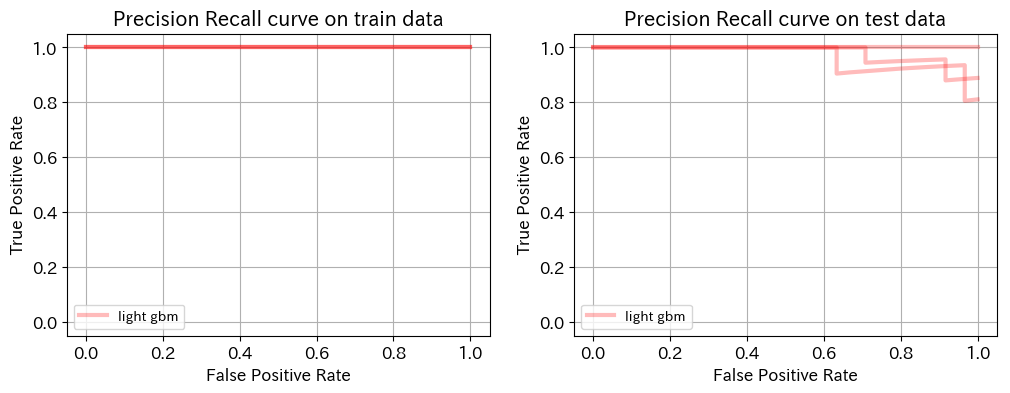

In [20]:
# [STEP 1-4]
# plot
fig = plt.figure(figsize=(12,4),dpi=100)

ax = plt.subplot(1, 2, 1)
auc_train = ppap_tab_cls.draw_pr(y_hat      = y_train_hat, 
                                 y          = y_train, 
                                 model_name = 'light gbm', 
                                 data_type  = 'train')
ax = plt.subplot(1, 2, 2)
auc_test = ppap_tab_cls.draw_pr(y_hat      = y_test_hat, 
                                y          = y_test, 
                                model_name = 'light gbm', 
                                data_type  = 'test')


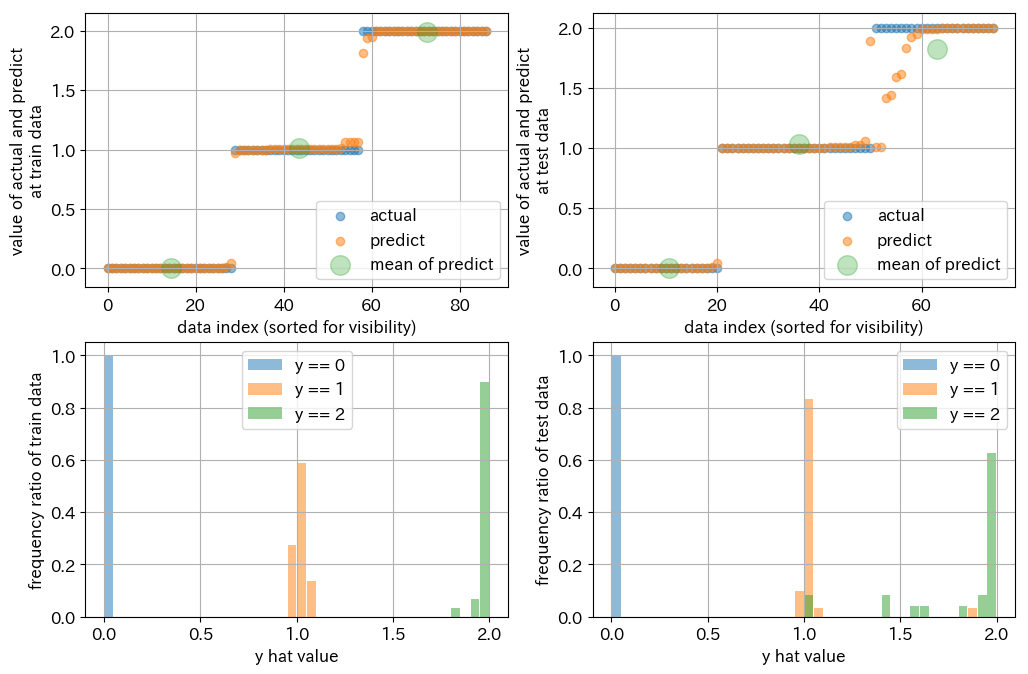

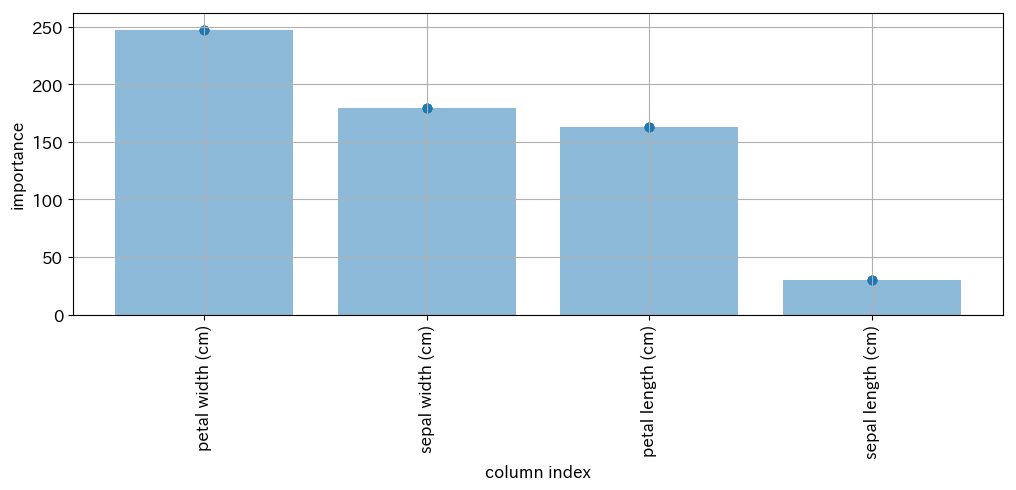

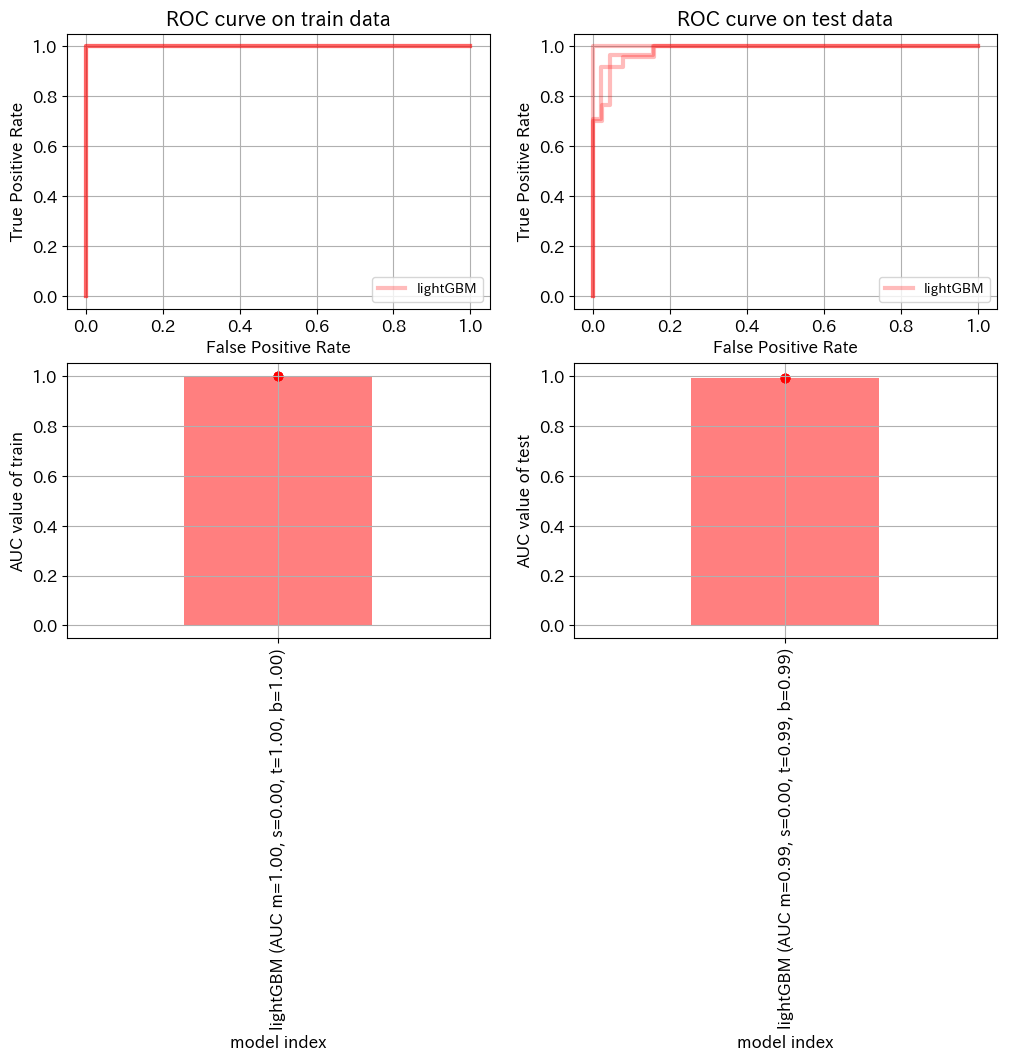

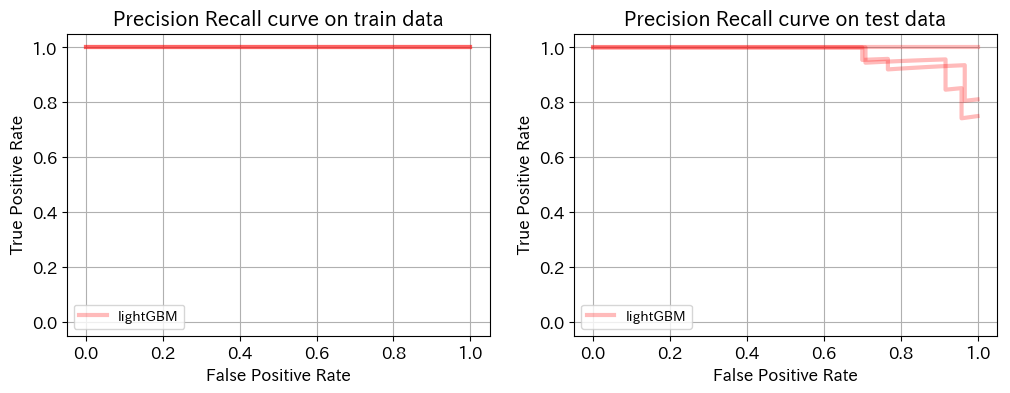

In [21]:
# [STEP 2]
# train and predict by one model (with upsampling)
model = LGBMClassifier(objective     = 'binary',  
                       learning_rate = 0.1, 
                       n_estimators  = 100, 
                       random_state  = 0, 
                       n_jobs        = 4) 

# exec
(model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_cls.train_predict_and_measure(X_train        = X_train,
                                                      y_train        = y_train,
                                                      X_test         = X_test,
                                                      y_test         = y_test, 
                                                      model          = model, 
                                                      column_name    = column_name, 
                                                      sample_balance = True, 
                                                      alpha          = 0.5)


train on cv (model:lightGBM, feature dim:4) [start time is 2019-07-10 13:57:56.907558]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:57:58.191517]




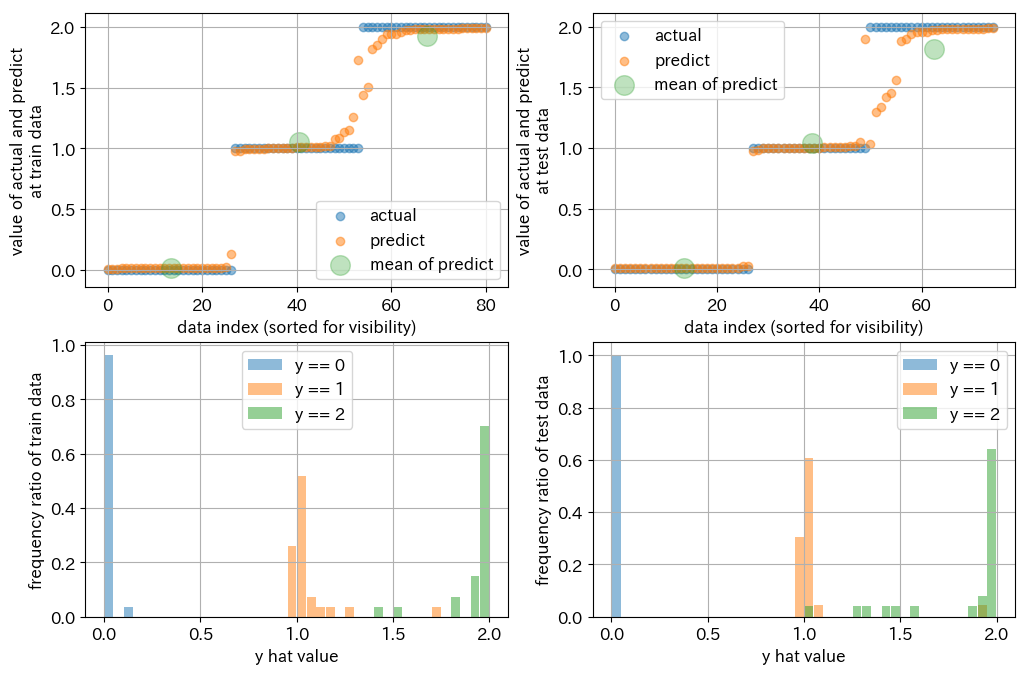

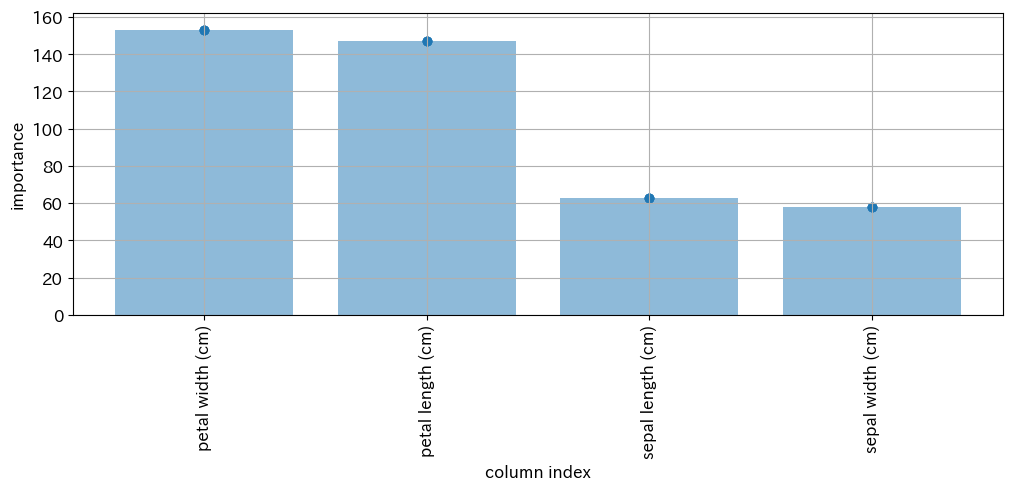

train on cv (model:XGBoost, feature dim:4) [start time is 2019-07-10 13:57:59.205360]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.98 [end time is 2019-07-10 13:57:59.894055]




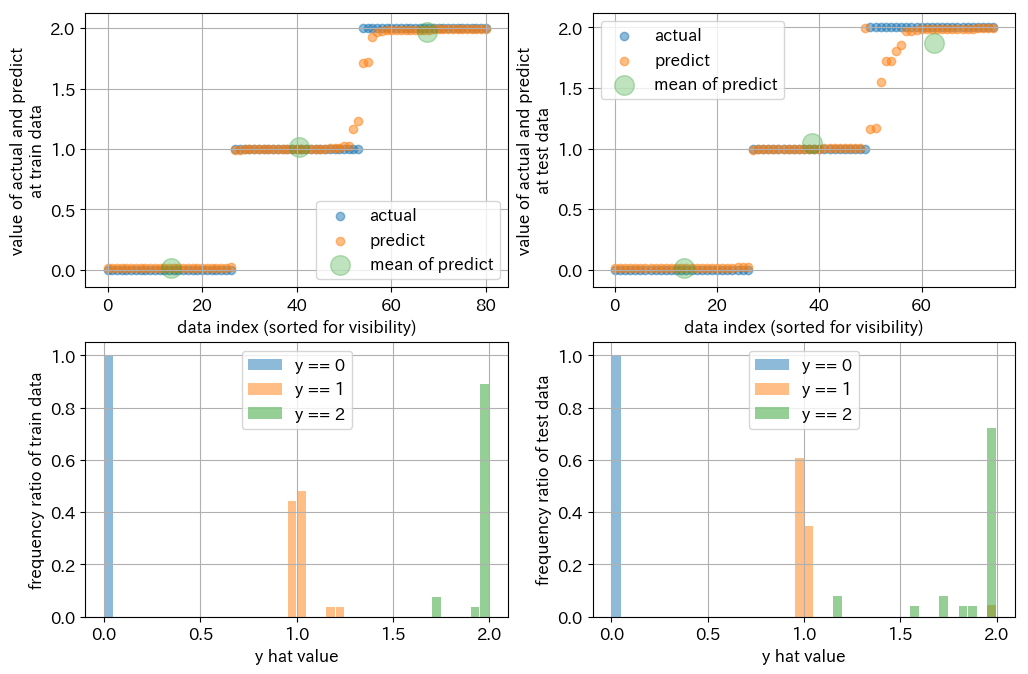

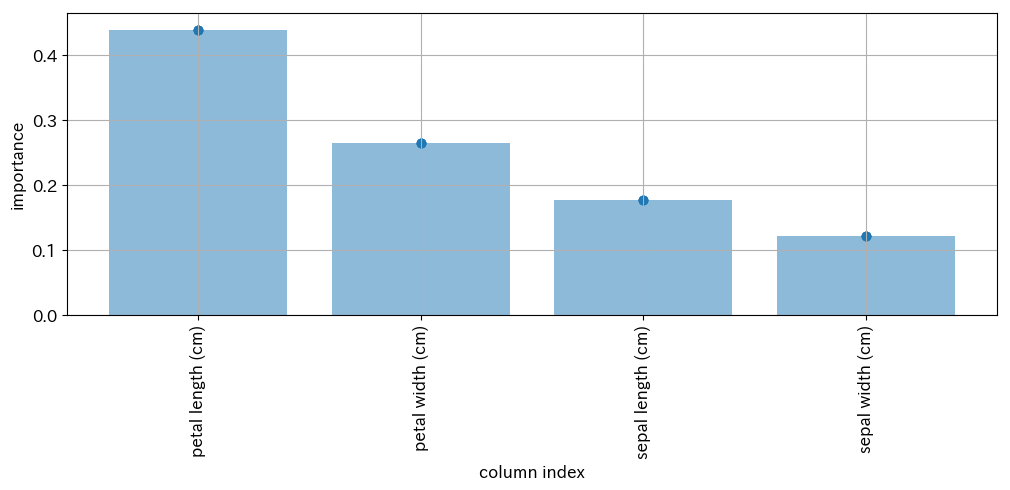

train on cv (model:LogReg, feature dim:4) [start time is 2019-07-10 13:58:00.948869]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.99, test = 0.98 [end time is 2019-07-10 13:58:02.361934]




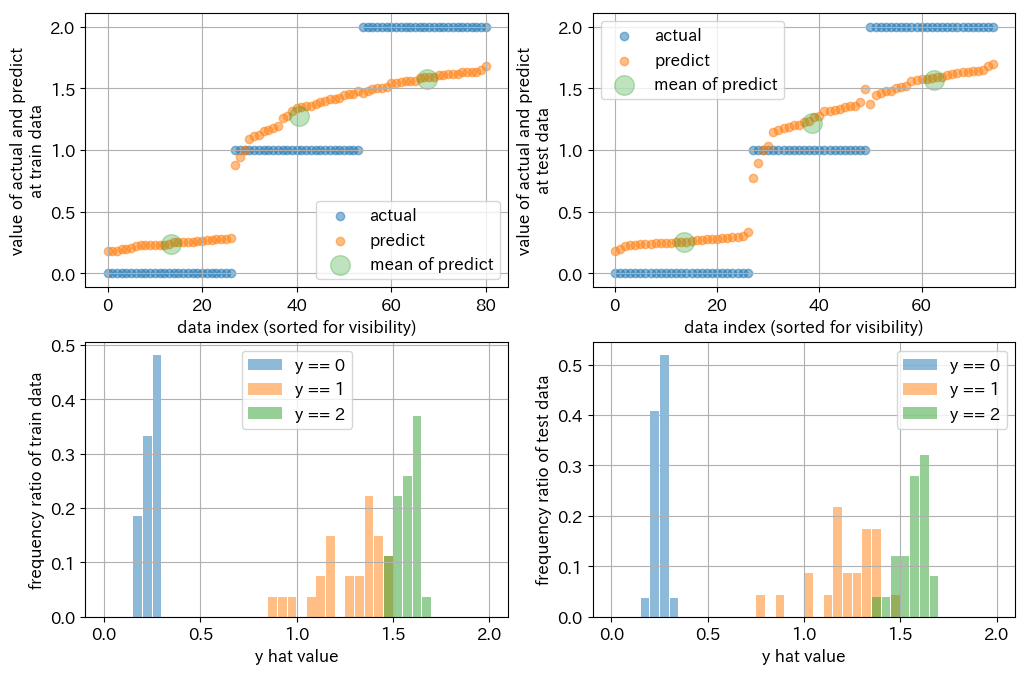

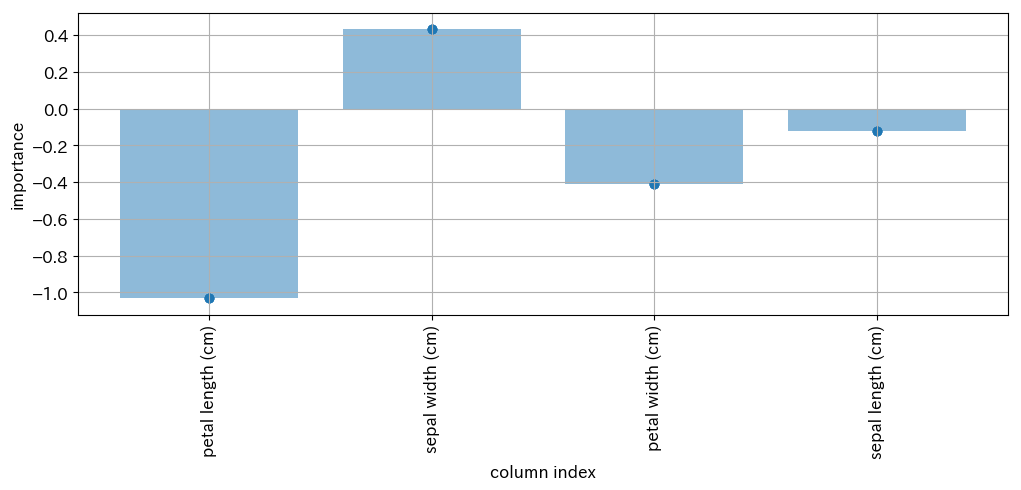



summary result


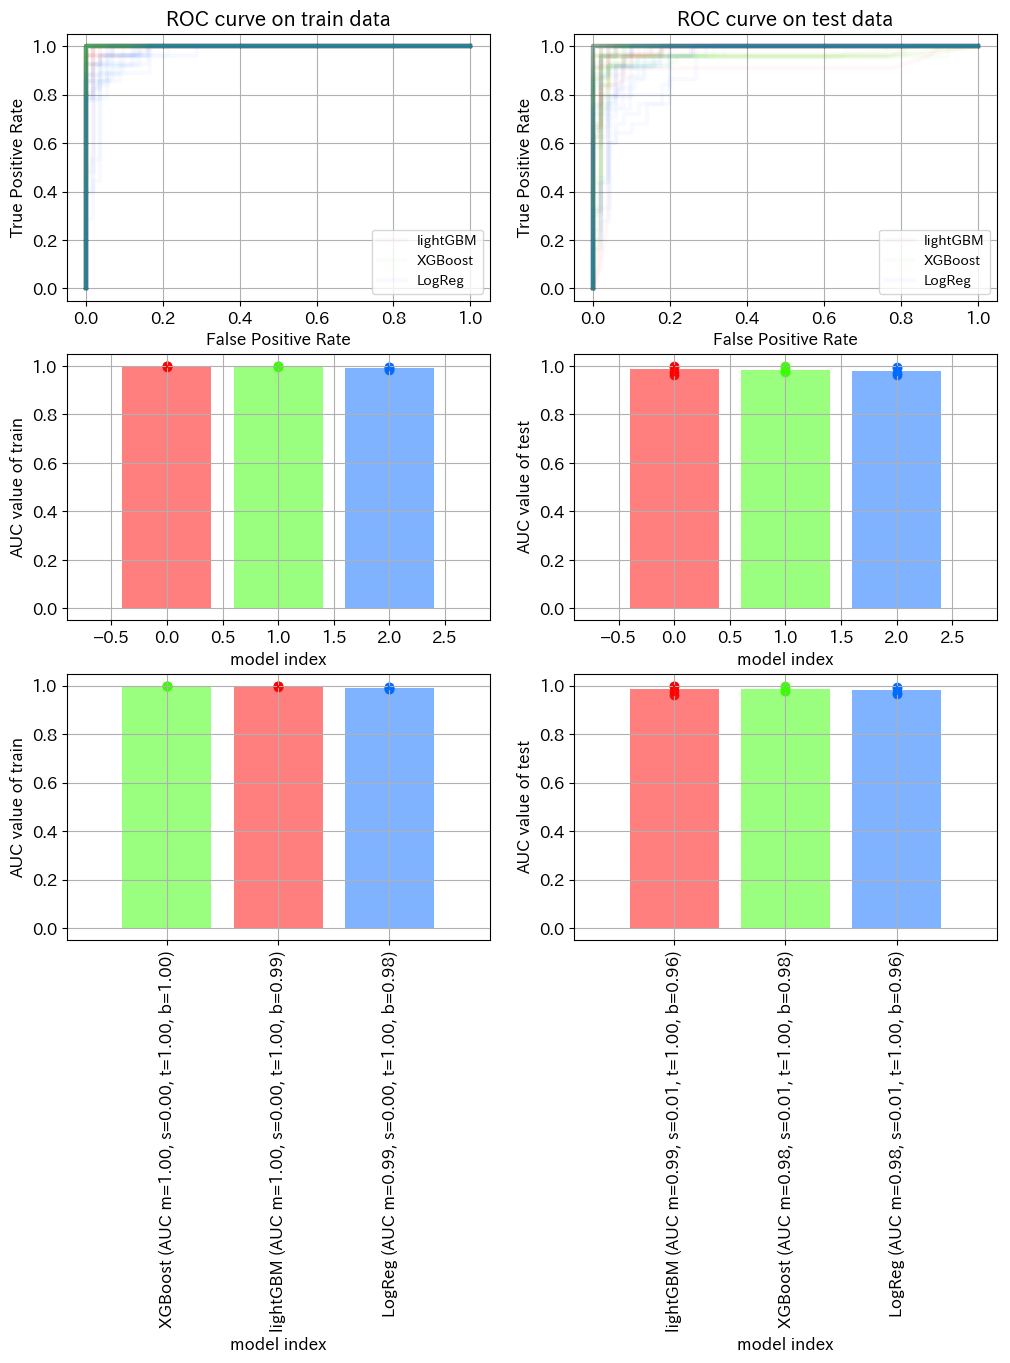

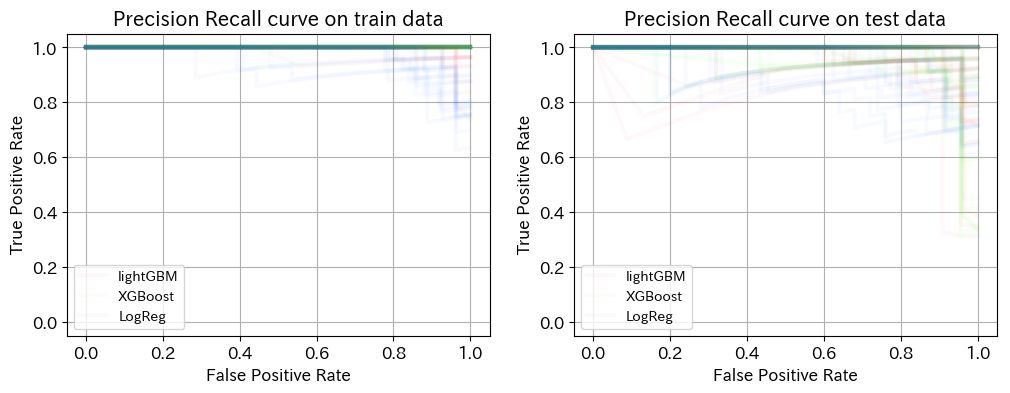

In [22]:
# [STEP 3]
# cross validation by multi model (with updampling)
model      = []
model_name = []

# 1. lightGBM
model_tmp = LGBMClassifier(objective        = 'binary',  
                           learning_rate    = 0.1, 
                           n_estimators     = 100, 
                           min_child_weight = 0.1,
                           num_leaves       = 20,
                           colsample_bytree = 0.5,
                           reg_lambda       = 2.0, 
                           random_state     = 0,
                           n_jobs           = 4) 
model.append(model_tmp)
model_name.append('lightGBM')

# 2. XGBoost
model_tmp = XGBClassifier(learning_rate = 0.1, 
                          n_estimators  = 100, 
                          max_depth     = 5, 
                          subsample     = 1.0, 
                          random_state  = 0, 
                          n_jobs        = 4) 
model.append(model_tmp)
model_name.append('XGBoost')

# 3. LogisticRegression
model_tmp = LogisticRegression(C      = 0.1, 
                               solver = 'sag', 
                               n_jobs = 4)
model.append(model_tmp)
model_name.append('LogReg')

# exec
(y_train_hat_stock_tmp, 
 y_train_stock_tmp, 
 y_test_hat_stock_tmp, 
 y_test_stock_tmp, 
 importance_stock_tmp) = ppap_tab_cls.cv_random(X              = X, 
                                                y              = y, 
                                                model          = model, 
                                                model_name     = model_name,
                                                column_name    = column_name,  
                                                sample_balance = True, 
                                                alpha          = 0.5)

plt.show()


train on cv (model:[m:0,r:0] lightGBM_param0_RFE4, feature dim:4) [start time is 2019-07-10 13:58:05.476976]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:58:06.687535]




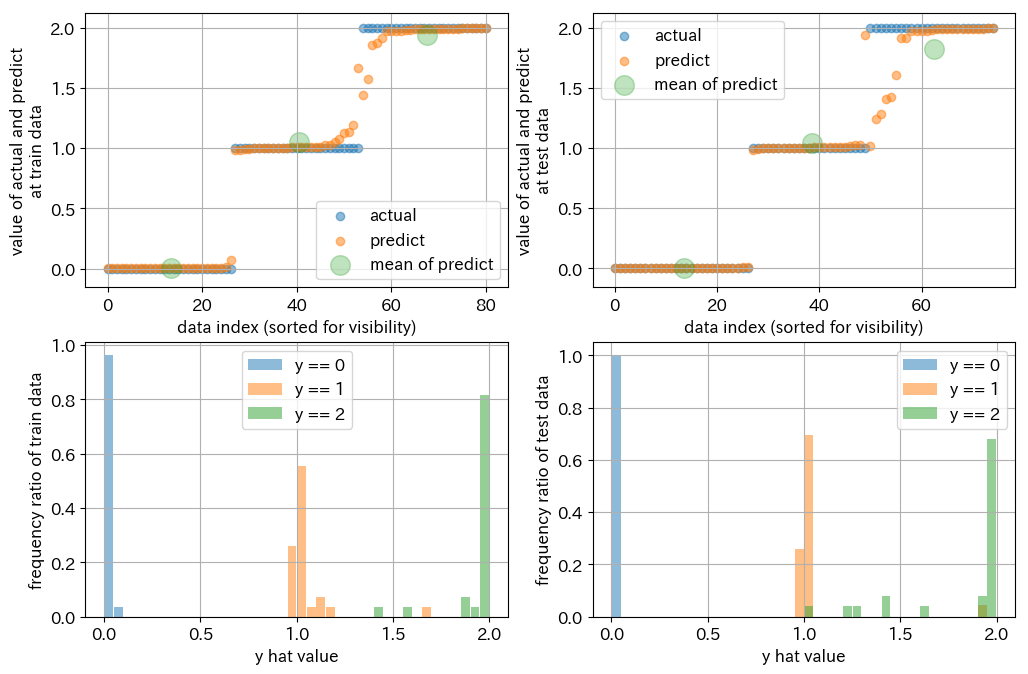

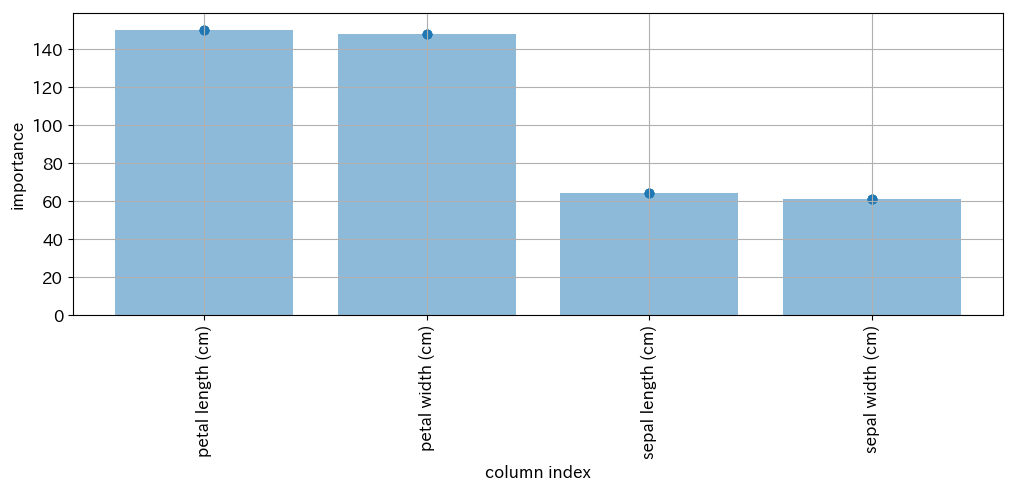

train on cv (model:[m:0,r:1] lightGBM_param0_RFE3, feature dim:3) [start time is 2019-07-10 13:58:07.788934]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:58:08.943927]




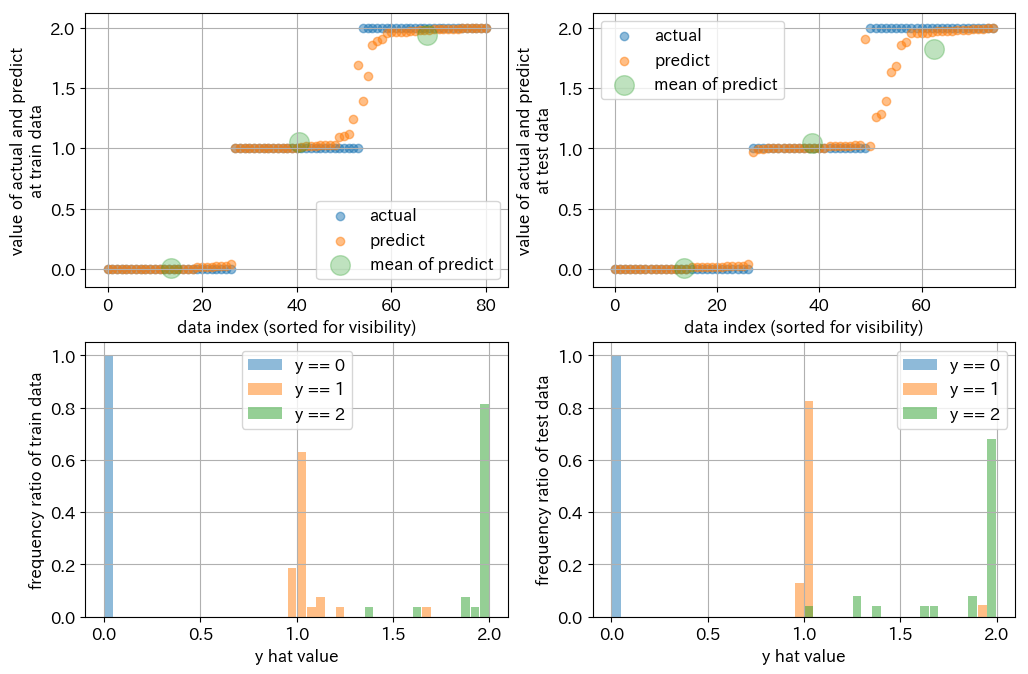

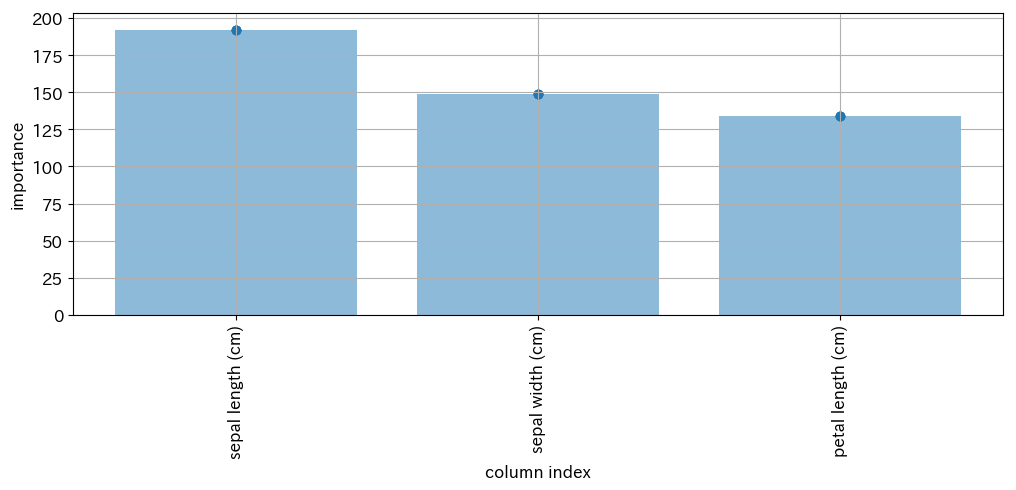

train on cv (model:[m:0,r:2] lightGBM_param0_RFE2, feature dim:2) [start time is 2019-07-10 13:58:10.071330]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.99, test = 0.98 [end time is 2019-07-10 13:58:11.961243]




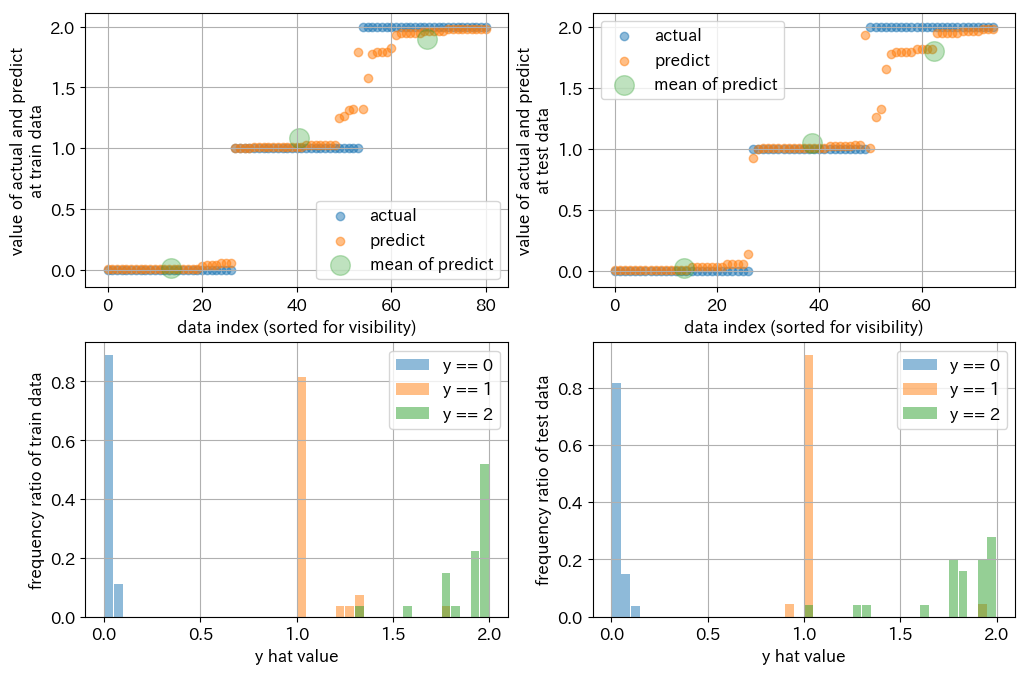

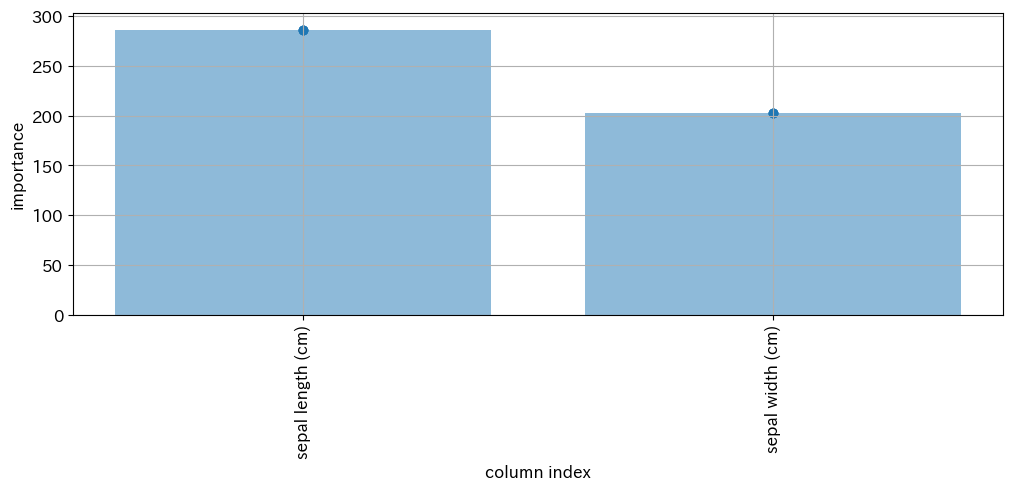

train on cv (model:[m:0,r:3] lightGBM_param0_RFE1, feature dim:1) [start time is 2019-07-10 13:58:13.079507]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.78, test = 0.74 [end time is 2019-07-10 13:58:14.518620]




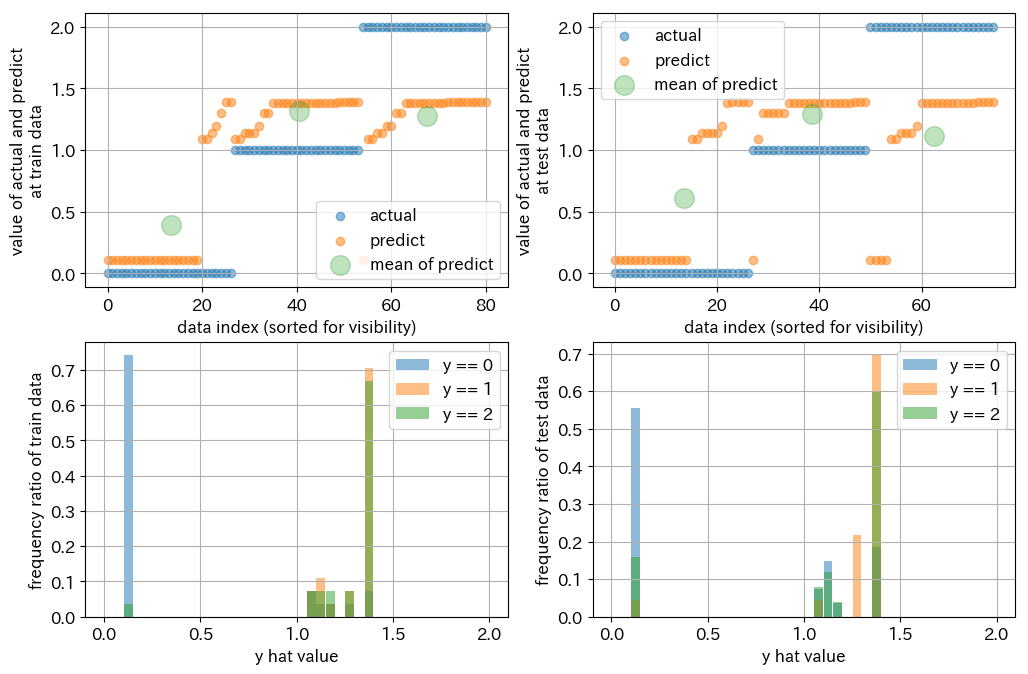

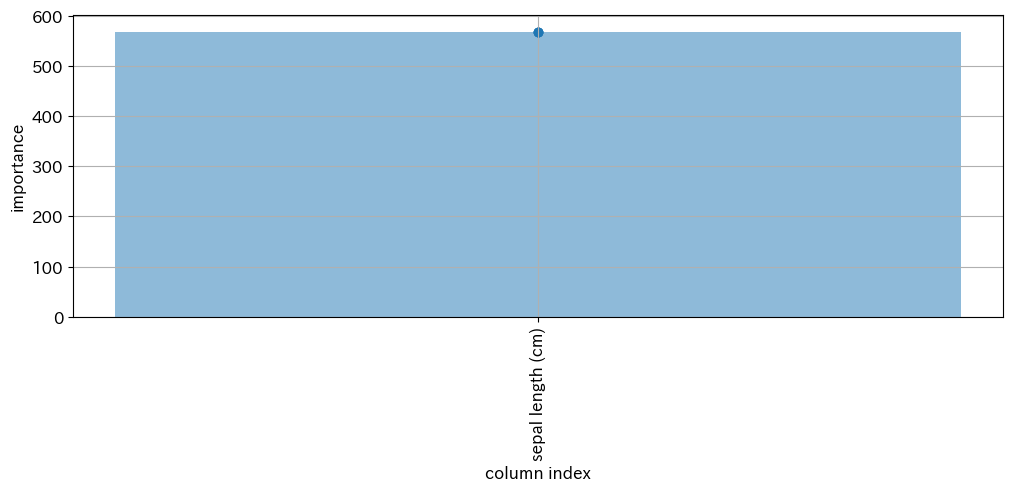

train on cv (model:[m:1,r:0] XGBoost_param0_RFE4, feature dim:4) [start time is 2019-07-10 13:58:15.742121]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:58:18.236709]




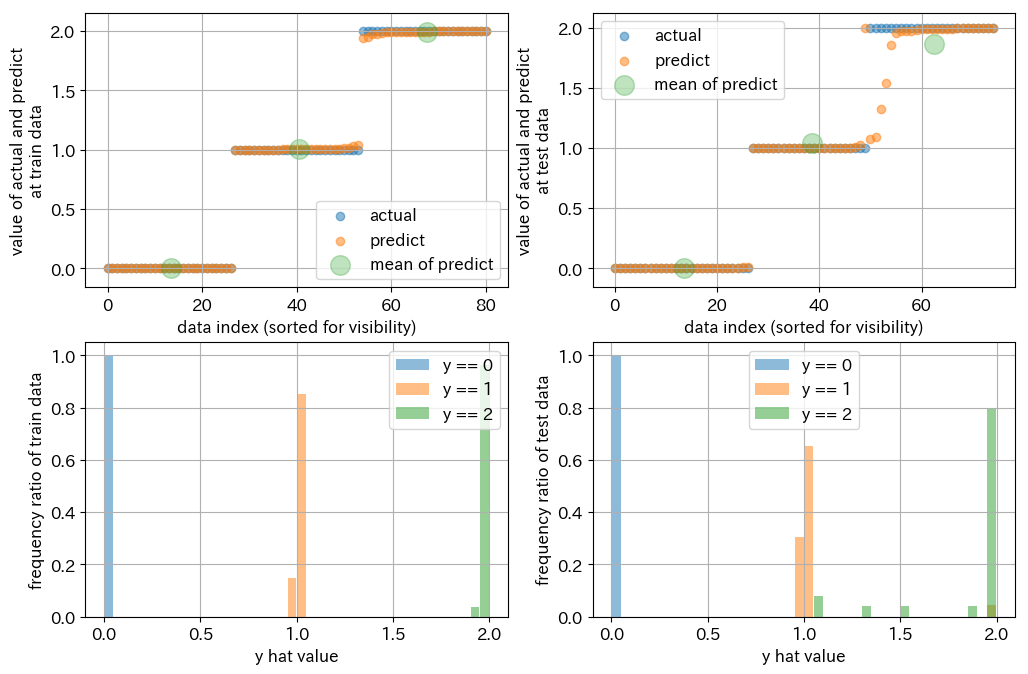

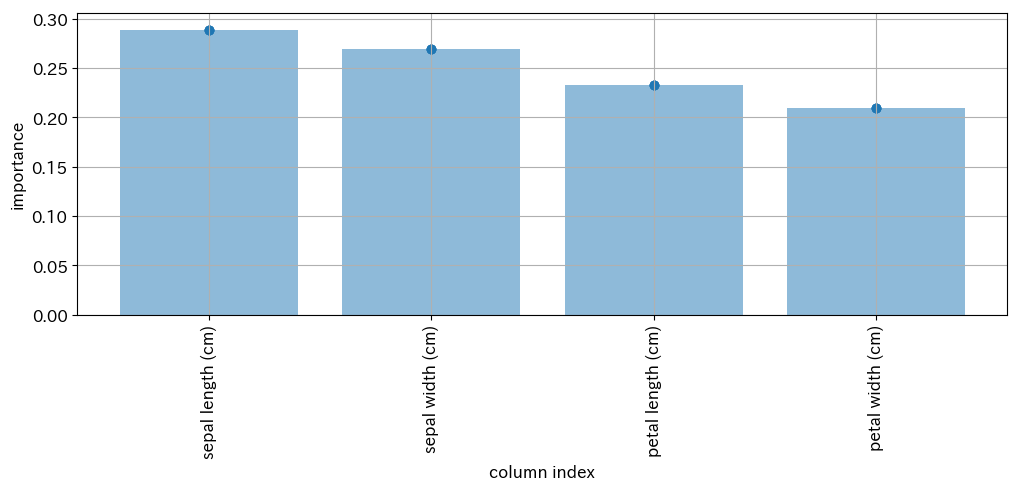

train on cv (model:[m:1,r:1] XGBoost_param0_RFE3, feature dim:3) [start time is 2019-07-10 13:58:19.739072]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.96 [end time is 2019-07-10 13:58:22.905532]




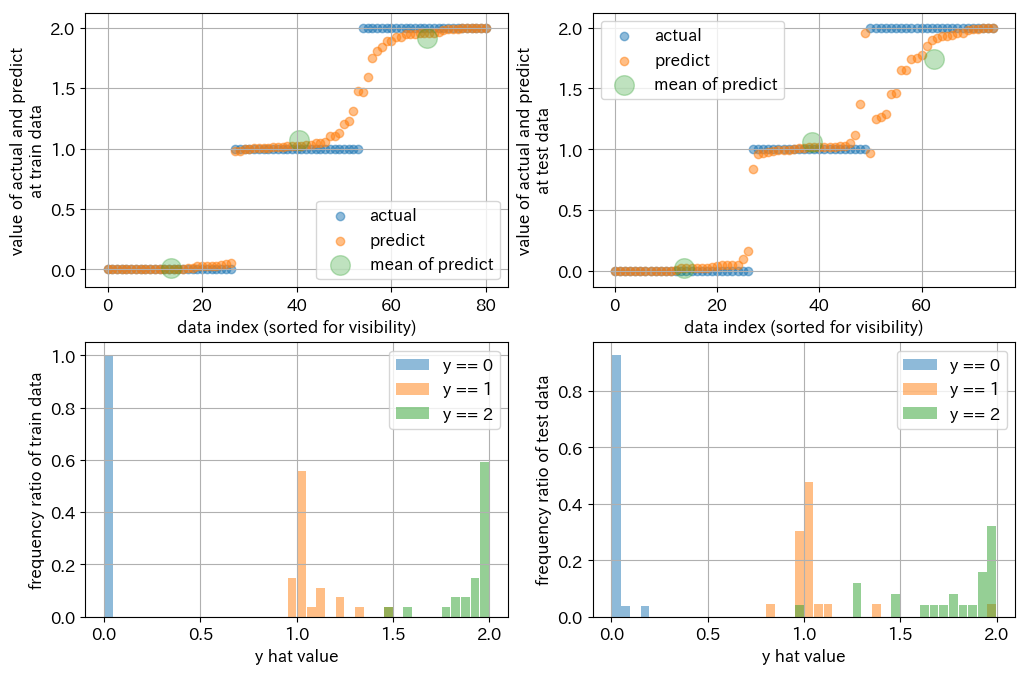

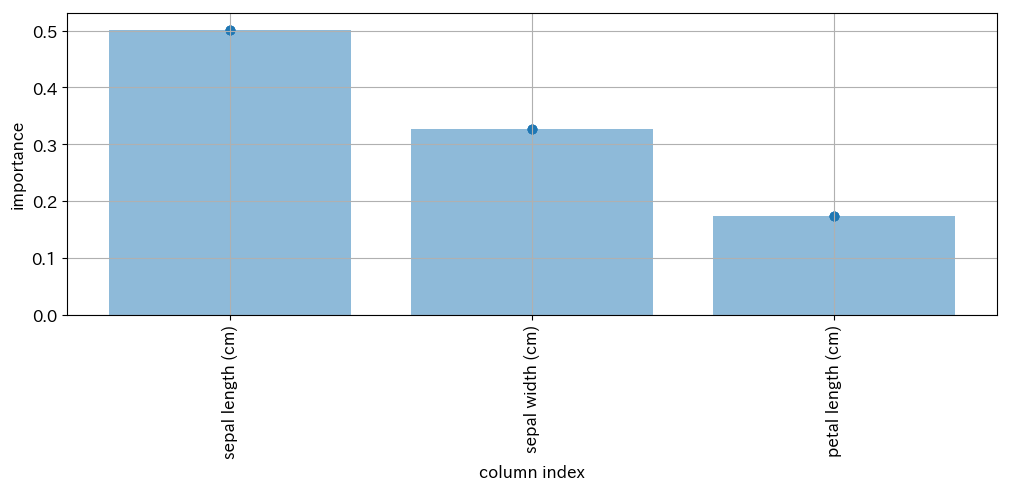

train on cv (model:[m:1,r:2] XGBoost_param0_RFE2, feature dim:2) [start time is 2019-07-10 13:58:23.997103]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.99, test = 0.85 [end time is 2019-07-10 13:58:24.635290]




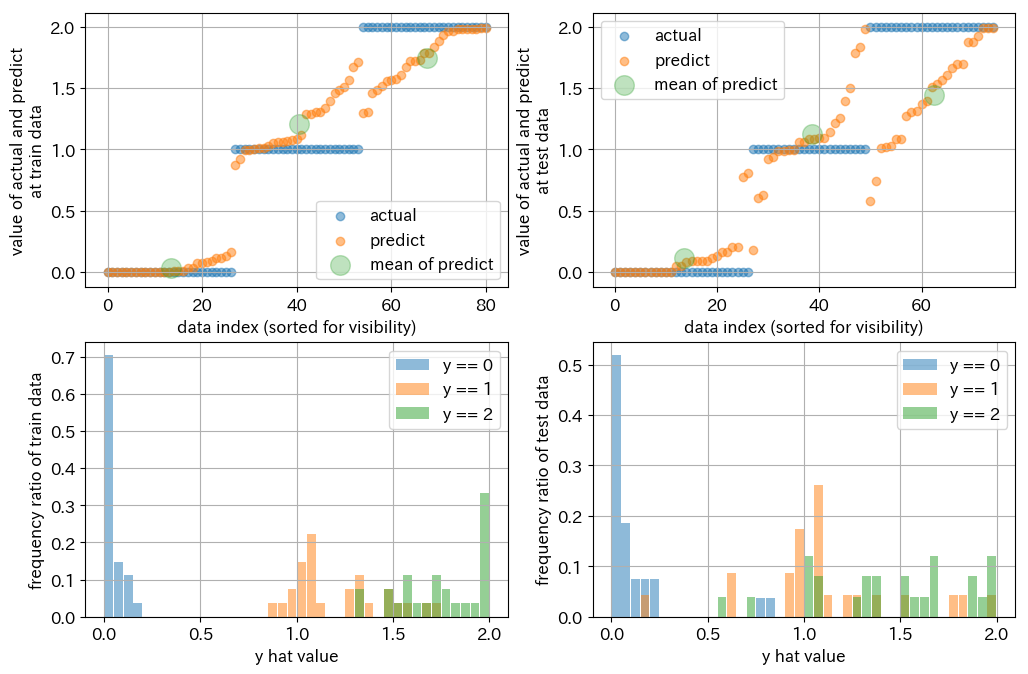

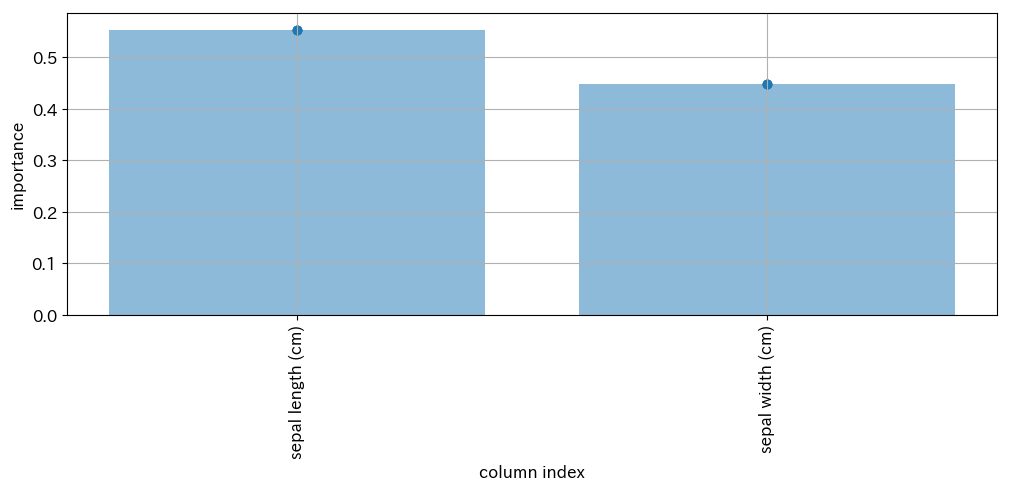

train on cv (model:[m:1,r:3] XGBoost_param0_RFE1, feature dim:1) [start time is 2019-07-10 13:58:25.626389]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.84, test = 0.70 [end time is 2019-07-10 13:58:26.372698]




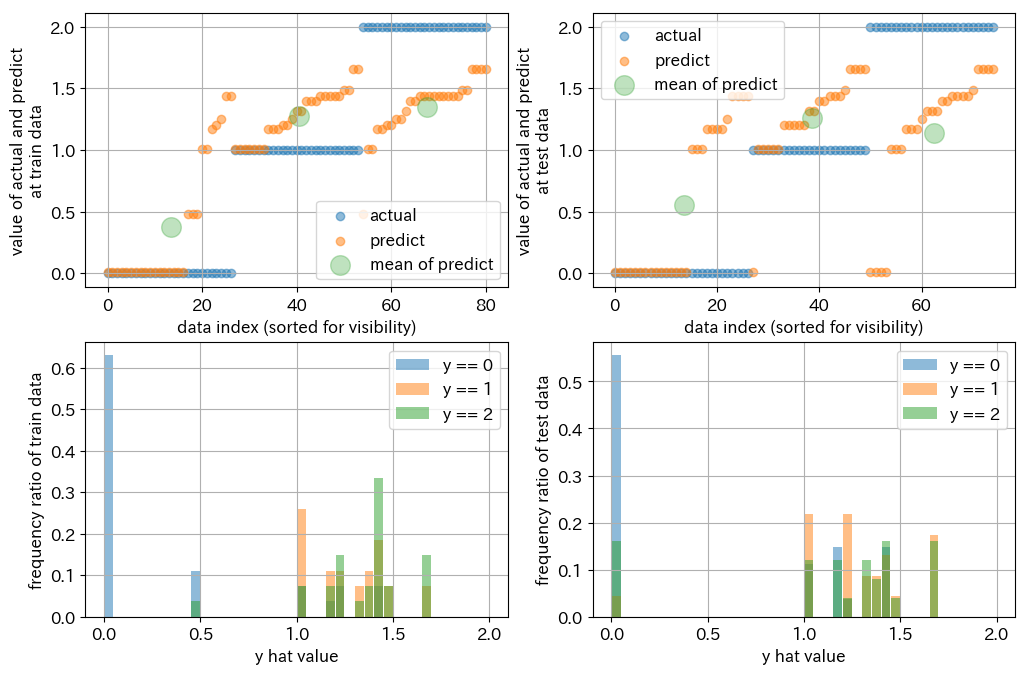

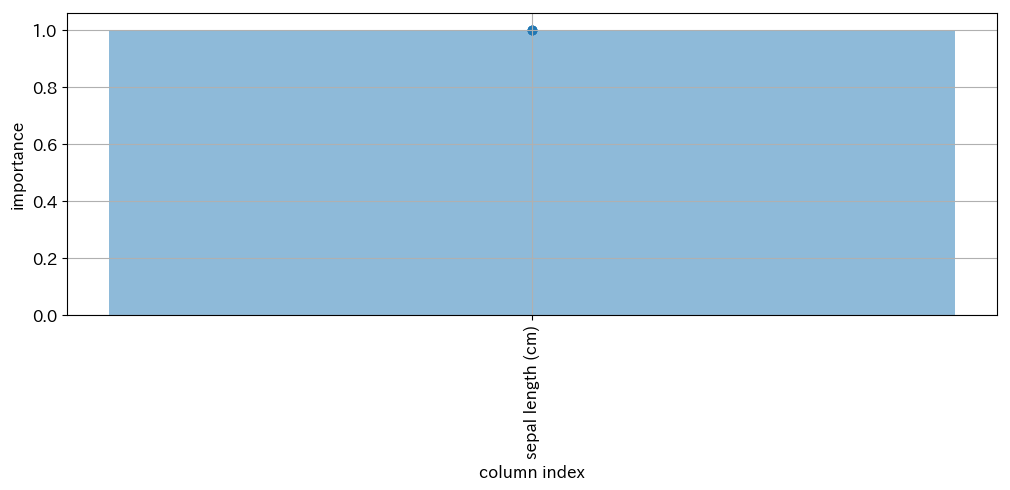

train on cv (model:[m:2,r:0] LogReg_param0_RFE4, feature dim:4) [start time is 2019-07-10 13:58:27.356524]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.99, test = 0.98 [end time is 2019-07-10 13:58:28.775419]




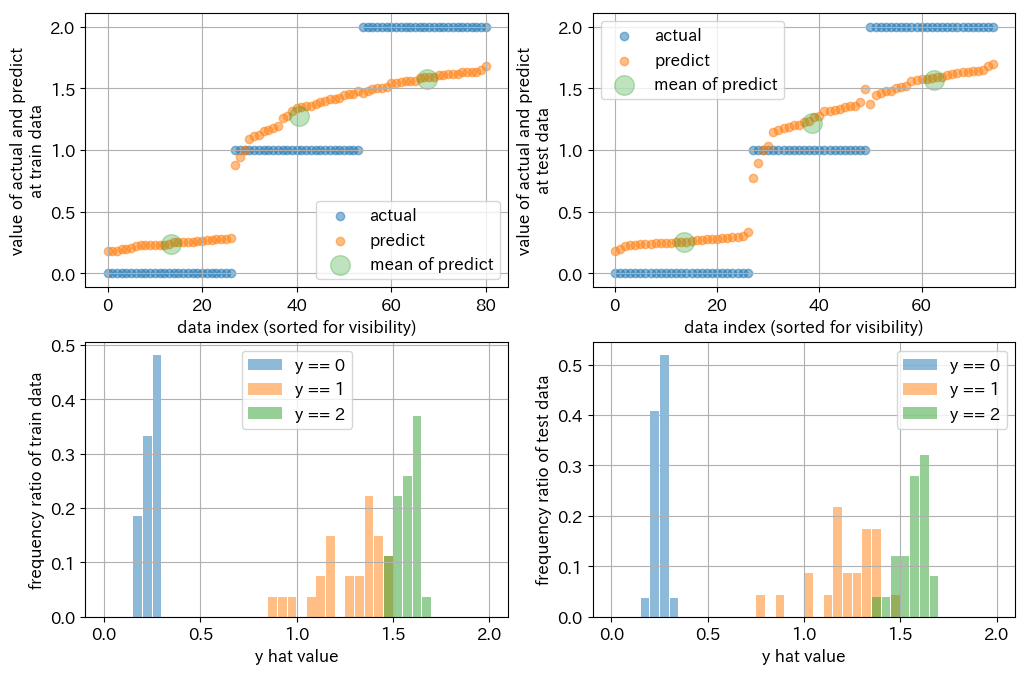

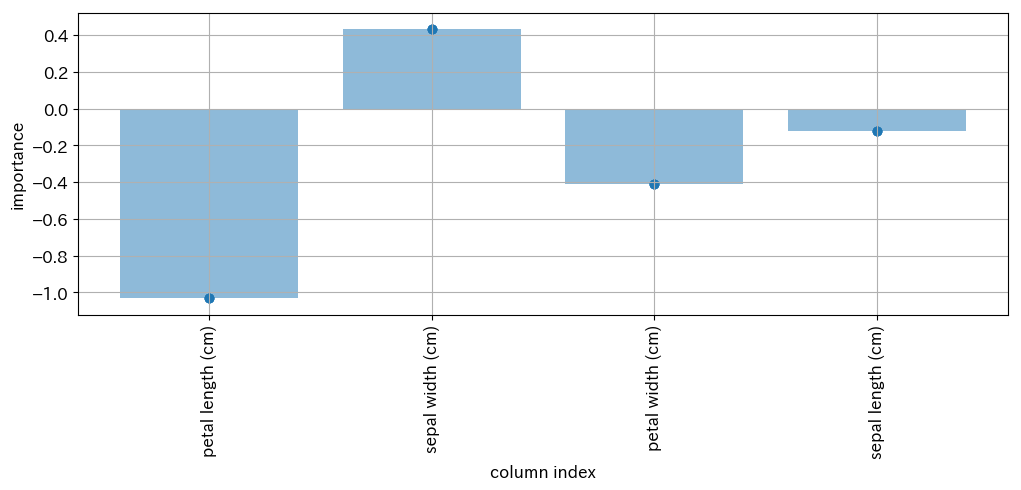

train on cv (model:[m:2,r:1] LogReg_param0_RFE3, feature dim:3) [start time is 2019-07-10 13:58:29.784161]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.96, test = 0.94 [end time is 2019-07-10 13:58:31.194454]




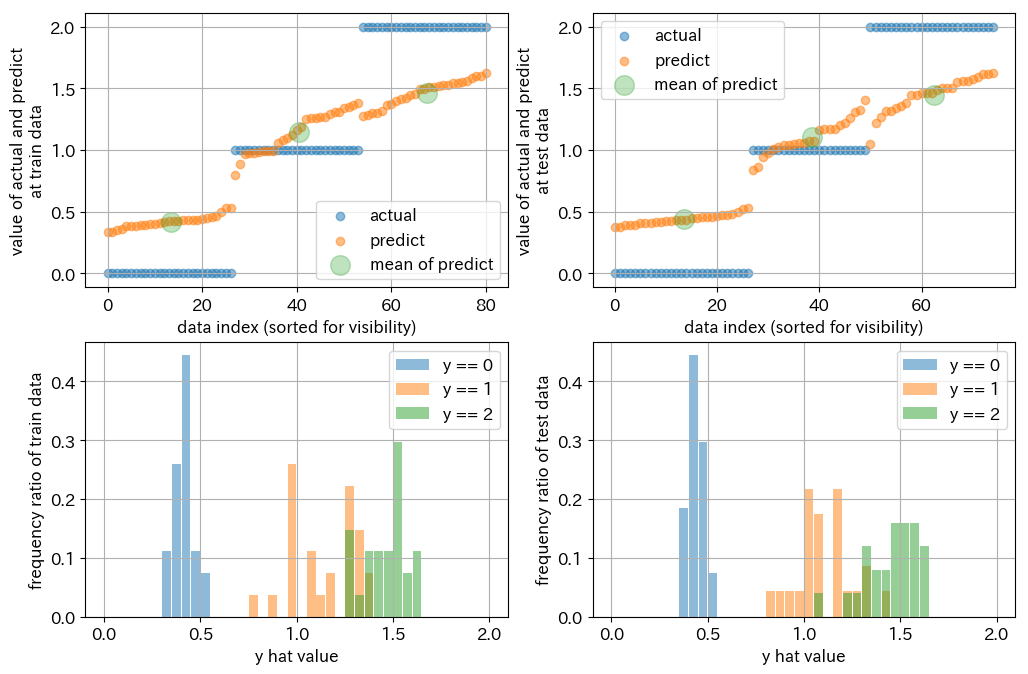

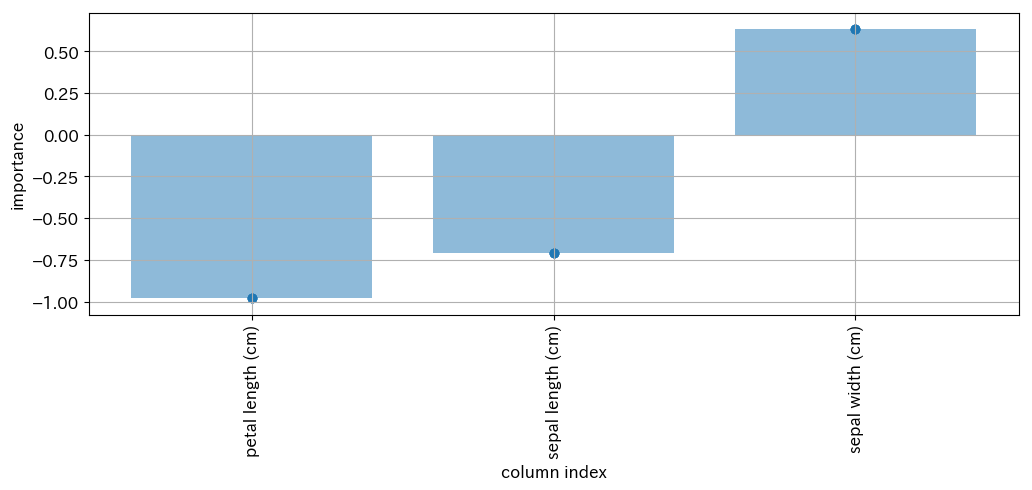

train on cv (model:[m:2,r:2] LogReg_param0_RFE2, feature dim:2) [start time is 2019-07-10 13:58:32.168758]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.98, test = 0.98 [end time is 2019-07-10 13:58:33.699344]




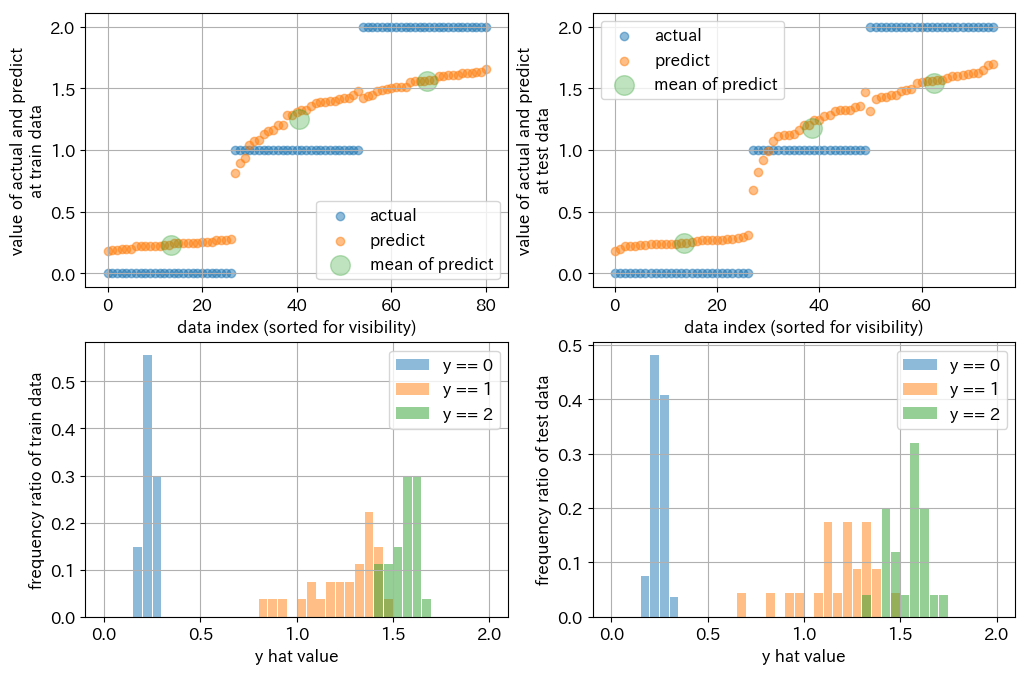

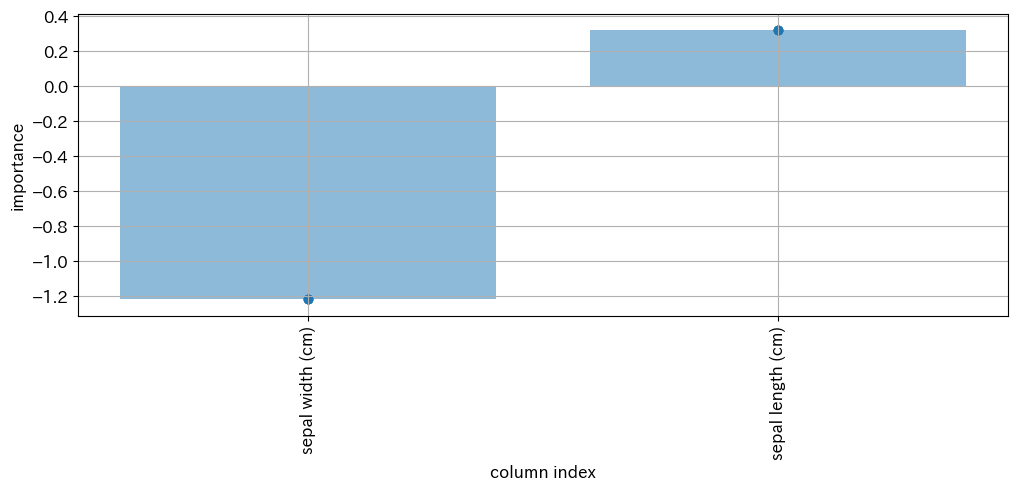

train on cv (model:[m:2,r:3] LogReg_param0_RFE1, feature dim:1) [start time is 2019-07-10 13:58:34.675926]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.76, test = 0.75 [end time is 2019-07-10 13:58:36.081313]




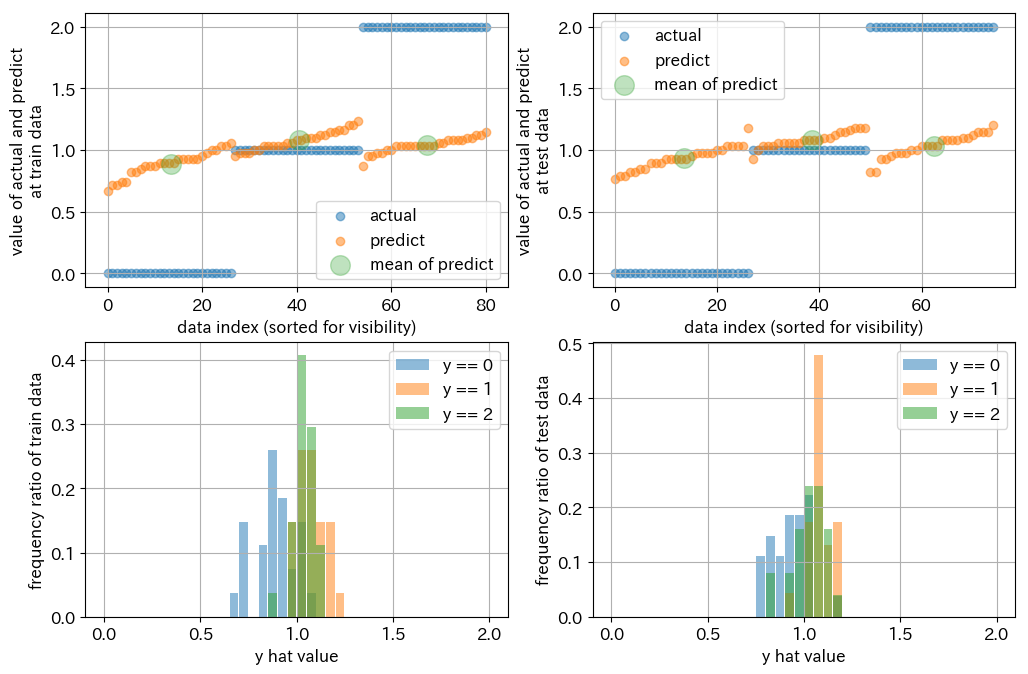

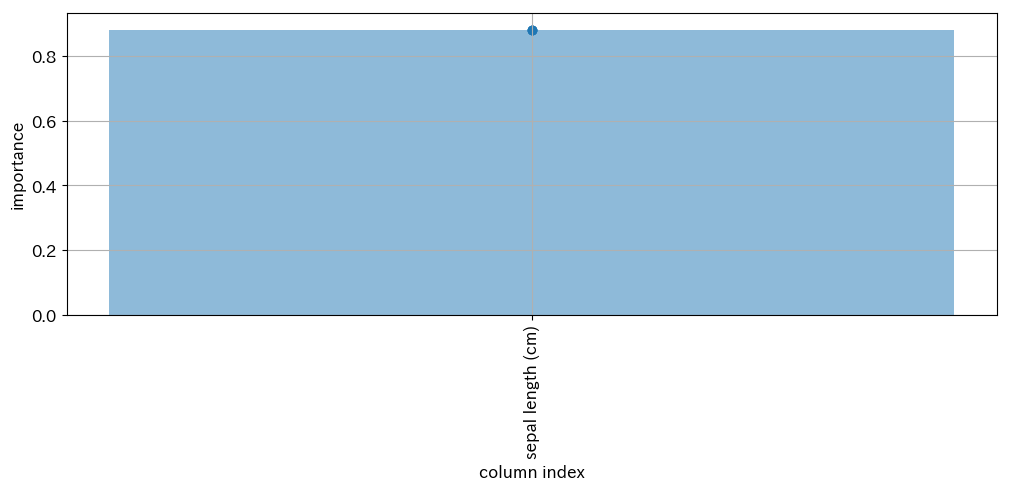



summary result


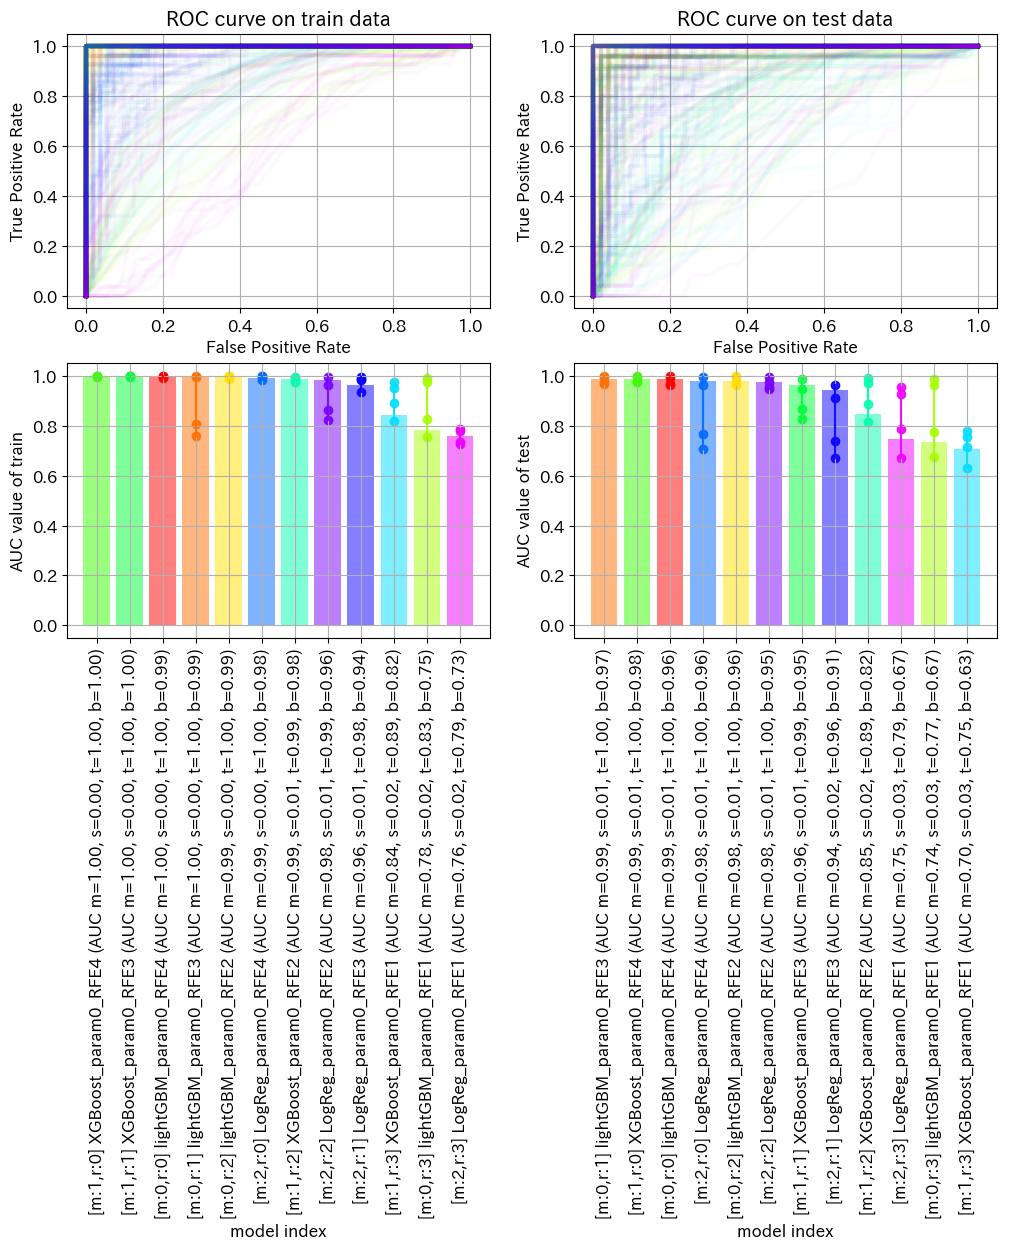

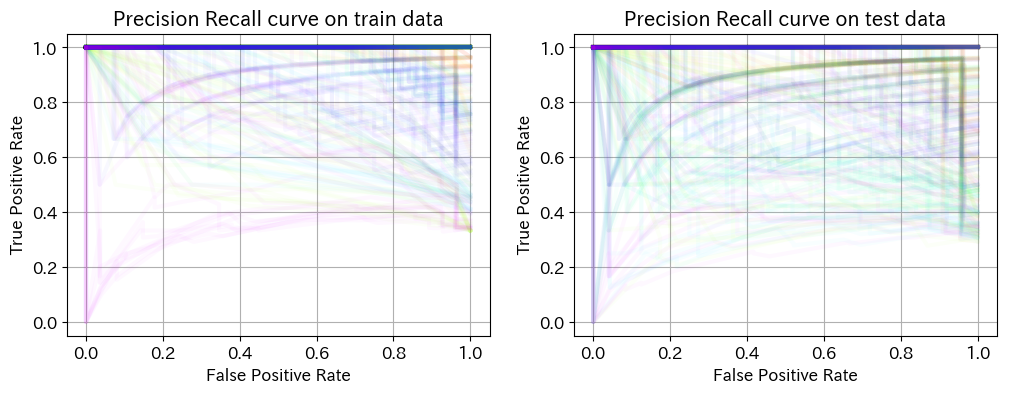

In [23]:
# [STEP 4]
# cross validation by multi model and rfe (with upsampling)
model      = []
model_name = []

# set common param
rfe_step   = [3, 2, 1]

# 1. lightGBM
param = [[0.1, 100, 0.1, 30, 0.5, 0.5]]
for param_i in range(len(param)):
    model_tmp = LGBMClassifier(objective        = 'binary',  
                               learning_rate    = param[param_i][0], 
                               n_estimators     = param[param_i][1], 
                               min_child_weight = param[param_i][2],
                               num_leaves       = param[param_i][3],
                               colsample_bytree = param[param_i][4],
                               reg_lambda       = param[param_i][5],
                               subsample        = 1.0, 
                               random_state     = 0, 
                               n_jobs           = 3) 
    model.append(model_tmp)
    model_name.append('lightGBM_param%d' % (param_i))

# 2. XGBoost
param = [[0.1, 100, 0.1, 5, 0.5, 0.5]]
for param_i in range(len(param)):
    model_tmp = XGBClassifier(learning_rate    = param[param_i][0], 
                              n_estimators     = param[param_i][1], 
                              min_child_weight = param[param_i][2],
                              max_depth        = param[param_i][3],
                              colsample_bytree = param[param_i][4],
                              reg_lambda       = param[param_i][5],
                              subsample        = 1.0, 
                              random_state     = 0, 
                              n_jobs           = 3) 
    model.append(model_tmp)
    model_name.append('XGBoost_param%d' % (param_i))

# 3. LogisticRegression
param = [[0.1]]
for param_i in range(len(param)):
    model_tmp = LogisticRegression(C      = param[param_i][0], 
                                   solver = 'sag', 
                                   n_jobs = 3)
    model.append(model_tmp)
    model_name.append('LogReg_param%d' % (param_i))

# exec
(importance_stock, 
 rfe_step, 
 remain_idx, 
 model_name_stock, 
 idx_sort_auc_test) = ppap_tab_cls.rfe_and_cv(X              = X, 
                                              y              = y, 
                                              model          = model, 
                                              model_name     = model_name, 
                                              column_name    = column_name,
                                              sample_balance = True, 
                                              rfe_step       = rfe_step, 
                                              draw_cv_ratio  = 0.1, 
                                              alpha          = 0.5)

plt.show()


model is ...
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.1, min_split_gain=0.0,
        n_estimators=100, n_jobs=3, num_leaves=30, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.5, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

use feature is ...
  - sepal width (cm) : 185.80
  - petal length (cm) : 158.50
  - petal width (cm) : 129.80

train on cv (model:lightGBM_param0, feature dim:3) [start time is 2019-07-10 13:58:44.219590]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:58:46.024145]




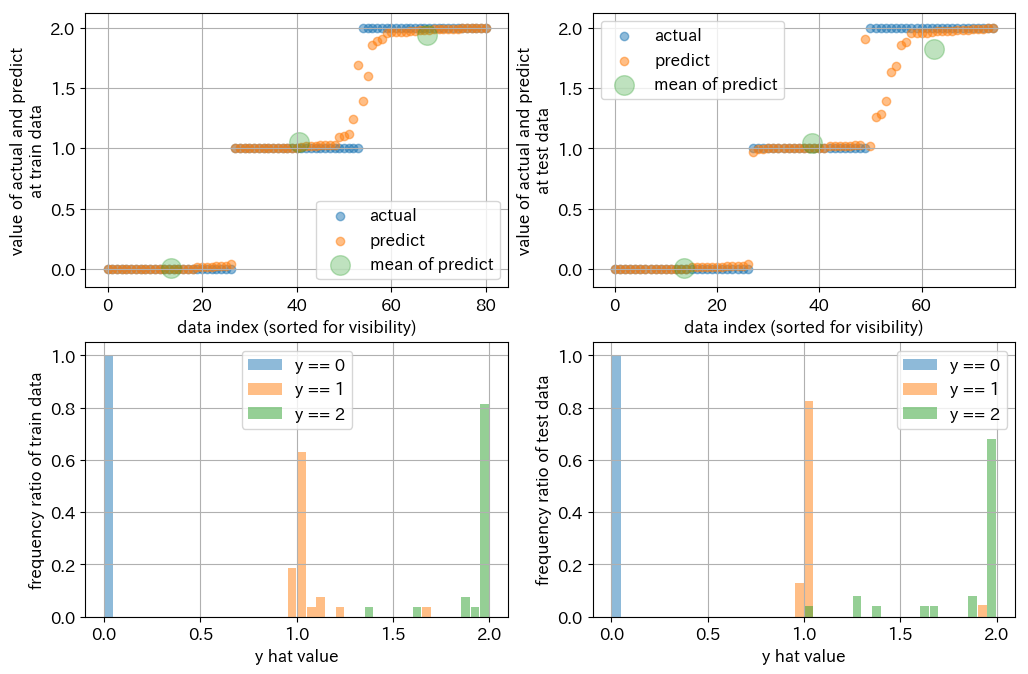

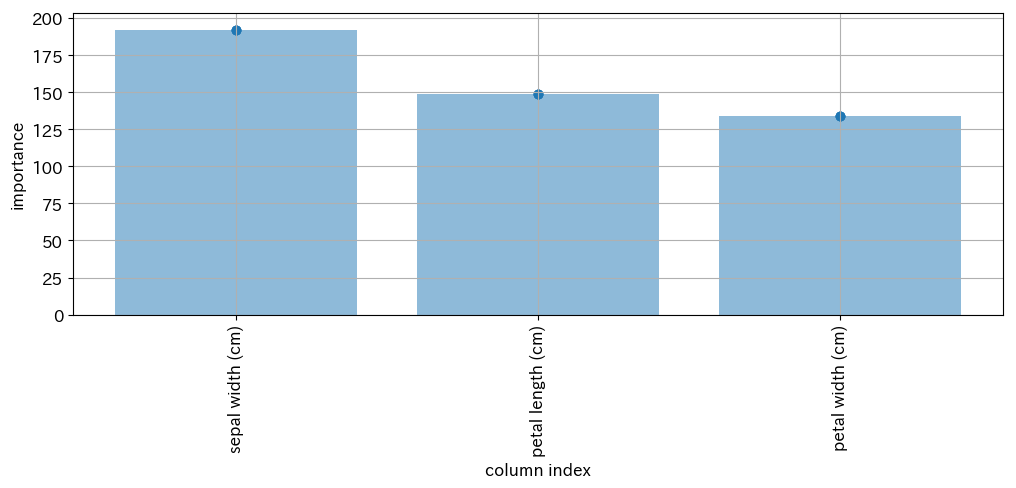



summary result


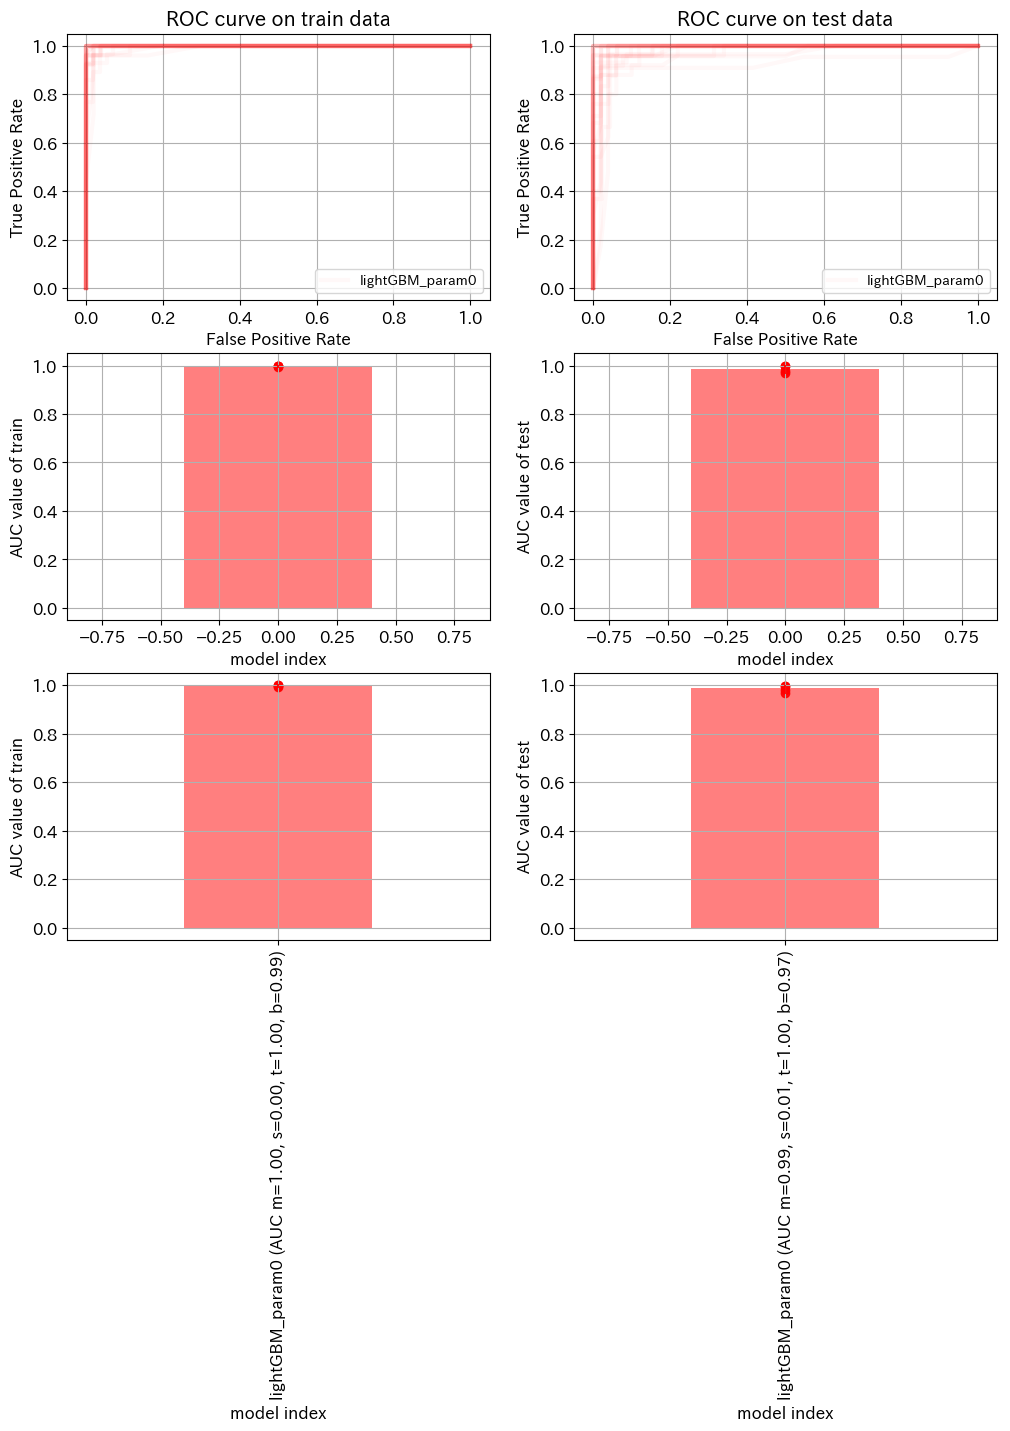

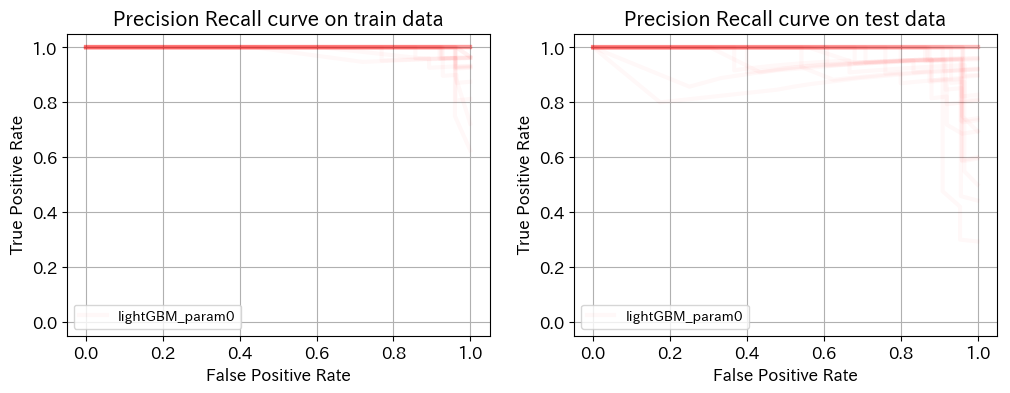

In [24]:
# [STEP ５]
# do the learning by good param setting 
rank_i       = 0 # choise method that column is small 

# 
model_i      = int(np.floor(idx_sort_auc_test[rank_i] / len(rfe_step)))
model_name_i = idx_sort_auc_test[rank_i]
rfe_step_i   = int(idx_sort_auc_test[rank_i] % len(rfe_step))

# 
model_       = model[model_i]
model_name_  = model_name_stock[idx_sort_auc_test[rank_i]]
model_name_  = model_name_[(model_name_.find('] ') + 2):]
model_name_  = model_name_[:model_name_.find('_RFE')]

# 
remain_idx_  = remain_idx[:, model_i, rfe_step_i]
X_slim       = X[:, remain_idx_]
column_name_ = column_name[remain_idx_]

# 
importance_  = np.mean(importance_stock[:, :, model_i, rfe_step_i], axis=1)

# 
print('model is ...')
print(model_)
print('')
print('use feature is ...')
for column_i in np.argsort(-importance_):
    if (remain_idx_[column_i]):
        print('  - %s : %.2f' % (column_name[column_i], importance_[column_i]))
print('')

# exec
(_, _, _, _, _) = ppap_tab_cls.cv_random(X              = X_slim, 
                                         y              = y, 
                                         model          = model_, 
                                         model_name     = model_name_, 
                                         column_name    = column_name_,
                                         sample_balance = True, 
                                         alpha          = 0.5)


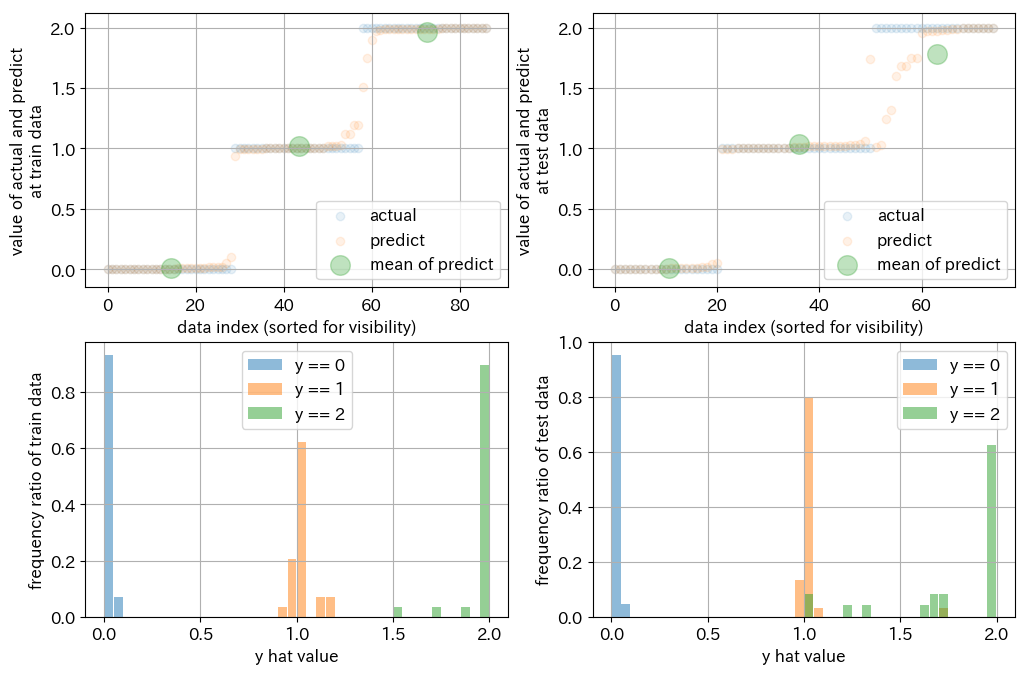

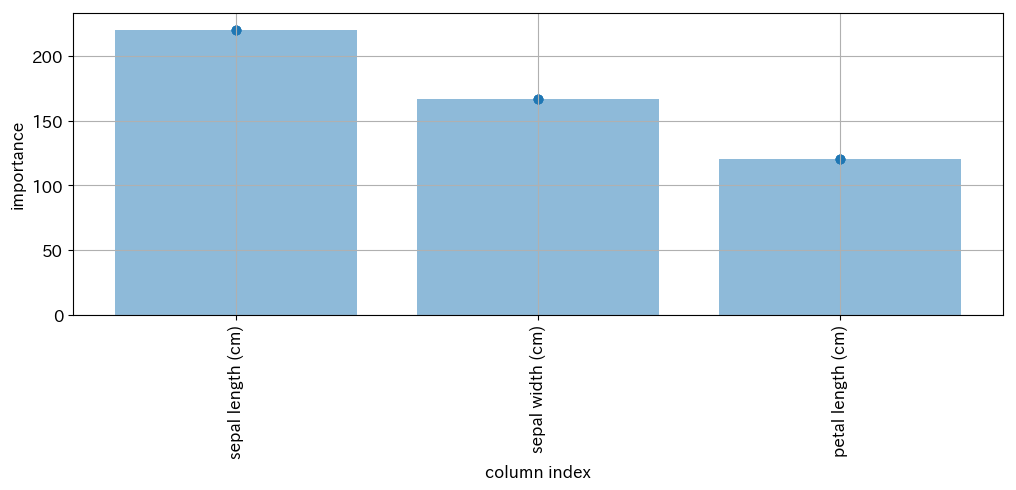

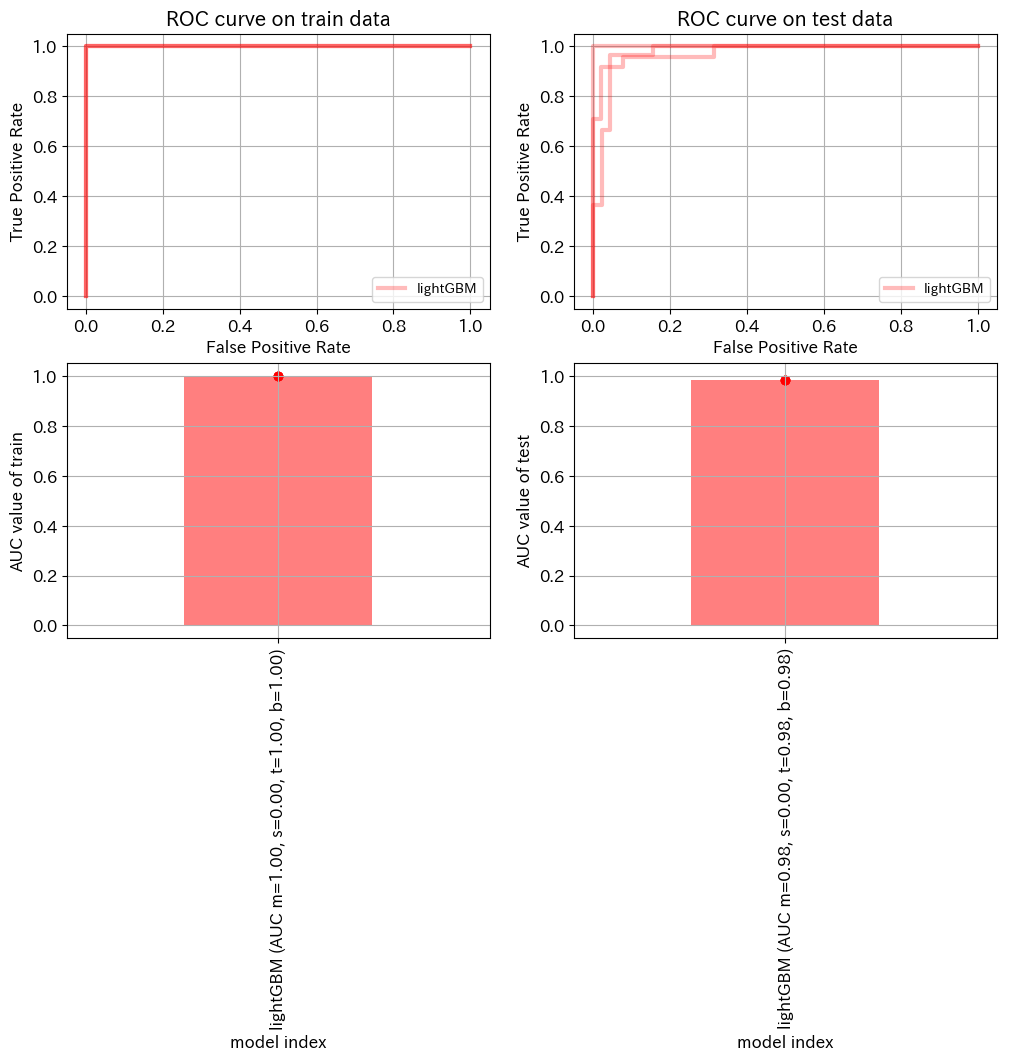

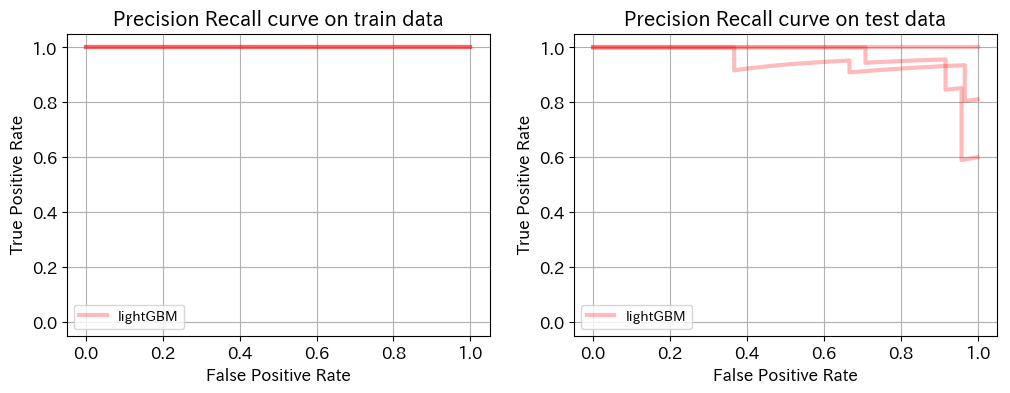

In [25]:
# [Step 6-1]
# try discretization for check wrong data
X_slim           = X[:, remain_idx_]
column_name_slim = column_name[remain_idx_]

# separate train data and test data
(X_train_slim, X_test_slim, 
 y_train, y_test) = train_test_split(X_slim, y, test_size=0.5, random_state=0)

# exec
np.random.seed(0) # need to confirm...
(learned_model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_cls.train_predict_and_measure(X_train        = X_train_slim,
                                                      y_train        = y_train,
                                                      X_test         = X_test_slim,
                                                      y_test         = y_test, 
                                                      model          = model_, 
                                                      column_name    = column_name, 
                                                      sample_balance = True)


In [26]:
# [Step 6-2]
# search large mistake

# knn search
(nearest_info) = ppap_tab_utl.knn_mistake_search(X           = X_test_slim, 
                                                 y           = y_test, 
                                                 y_hat       = y_test_hat, 
                                                 column_name = column_name_slim, 
                                                 k           = 20)

# view
df_nearest_info = nearest_info[0]
df_nearest_info


base                   neighbor1  \
data index                                 56                          57   
distance                                    0                    0.183332   
correct label                               2                           2   
prediction         0:0.001, 1:0.005, 2:0.995,  0:0.009, 1:0.982, 2:0.009,   
mistake                              0.989486                    0.247923   
sepal width (cm)                          2.5                         2.5   
petal length (cm)                         4.5                           5   
petal width (cm)                          1.7                         1.9   

                                    neighbor2                   neighbor3  \
data index                                 54                          37   
distance                              0.28424                    0.363185   
correct label                               2                           1   
prediction         0:0.997, 1:0.001, 2:0.001,  0:0.001, 1:0.025, 2:0.974,   
mistake                              0.677688                    0.750463   
sepal width (cm)                          2.7                         2.7   
petal length (cm)                         4.9                         5.1   
petal width (cm)                          1.8                         1.6   

                                    neighbor4                   neighbor5  \
data index                                 62                          65   
distance                             0.426673                    0.437286   
correct label                               2                           1   
prediction         0:0.997, 1:0.001, 2:0.001,  0:0.009, 1:0.003, 2:0.989,   
mistake                            0.00548327                    0.009296   
sepal width (cm)                          2.7                         2.5   
petal length (cm)                         5.1                           4   
petal width (cm)                          1.9                         1.3   

                                    neighbor6                   neighbor7  \
data index                                 24                          35   
distance                             0.506512                    0.532488   
correct label                               2                           1   
prediction         0:0.997, 1:0.001, 2:0.001,  0:0.010, 1:0.960, 2:0.031,   
mistake                              0.756669                  0.00629305   
sepal width (cm)                          2.8                         2.7   
petal length (cm)                         4.8                         3.9   
petal width (cm)                          1.8                         1.4   

                                    neighbor8                   neighbor9  \
data index                                 70                          13   
distance                             0.537196                    0.538423   
correct label                               2                           1   
prediction         0:0.001, 1:0.977, 2:0.021,  0:0.001, 1:0.991, 2:0.008,   
mistake                            0.00548327                   0.0226502   
sepal width (cm)                          2.7                         2.8   
petal length (cm)                         5.3                         4.6   
petal width (cm)                          1.9                         1.5   

                   ...                  neighbor11  \
data index         ...                          17   
distance           ...                    0.582999   
correct label      ...                           1   
prediction         ...  0:0.007, 1:0.987, 2:0.006,   
mistake            ...                  0.00912997   
sepal width (cm)   ...                         2.6   
petal length (cm)  ...                         4.4   
petal width (cm)   ...                         1.2   

                                   neighbor12                  neighbor13  \
data in

In [27]:
# 
pd.DataFrame(X_slim, columns=column_name_slim).describe()


sepal width (cm)  petal length (cm)  petal width (cm)
count        150.000000         150.000000        150.000000
mean           3.057333           3.758000          1.199334
std            0.435866           1.765299          0.762238
min            2.000000           1.000000          0.100000
25%            2.800000           1.600000          0.300000
50%            3.000000           4.350000          1.300000
75%            3.300000           5.100000          1.800000
max            4.400000           6.900000          2.500000

In [28]:
# # [Step 6-3]
# # try to make reduce mistake
# idx_tmp   = int(df_nearest_info.loc['data index', 'base'])
# y_tmp     = y_test[idx_tmp]
# X_tmp     = X_test_slim[[idx_tmp], :]
# y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
# print('y_hat before = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))

# # 
# example       = 'neighbor5'
# column_change = ['worst area', 'worst concave points']

# for column_i in range(len(column_change)):
#     X_tmp[:, column_name_slim == column_change[column_i]] = df_nearest_info.loc[column_change[column_i], example]
# y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
# print('y_hat after  = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))


In [29]:
# [Step 6-4]
# use LIME


In [30]:
# # [Step 7-1]
# # try discretization for check wrong data
# column_1k   = []               # set code column
# column_disc = column_name_slim # set real number column
# column_bow  = []               # set text column

# # discretization data value
# (X_disc, 
#  column_name_disc)= ppap_tab_utl.one_k_code_and_disc(X             = X_slim, 
#                                                     column_1k     = column_1k, 
#                                                     column_disc   = column_disc,
#                                                     column_bow    = column_bow, 
#                                                     column_name   = column_name_slim, 
#                                                     disc_bins_num = 5)

# # separate train data and test data
# (X_train_disc, X_test_disc, 
#  y_train, y_test) = train_test_split(X_disc, y, test_size=0.5, random_state=0)

# # exec
# (learned_model, 
#  y_train_hat, 
#  y_test_hat, 
#  X_train_up, 
#  y_train_up) = ppap_tab_cls.train_predict_and_measure(X_train        = X_train_disc,
#                                                      y_train        = y_train,
#                                                      X_test         = X_test_disc,
#                                                      y_test         = y_test, 
#                                                      model          = model_, 
#                                                      column_name    = column_name_disc, 
#                                                      sample_balance = True, 
#                                                      alpha          = 0.5)


In [31]:
# # [Step 7-2]
# # search large mistake

# # knn search
# (nearest_info) = ppap_tab_utl.knn_mistake_search(X           = X_test_disc, 
#                                                 y           = y_test, 
#                                                 y_hat       = y_test_hat, 
#                                                 column_name = column_name_disc, 
#                                                 k           = 20, 
#                                                 X_normalize = False)

# # view
# df_nearest_info = nearest_info[0]
# df_nearest_info


In [32]:
# # [Step 7-3]
# # try to make reduce mistake
# idx_tmp   = int(df_nearest_info.loc['data index', 'base'])
# y_tmp     = y_test[idx_tmp]
# X_tmp     = X_test_disc[[idx_tmp], :]
# y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
# print('y_hat before = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))

# # 
# example       = 'neighbor1'
# column_change = ['worst concave points_v[0.058-0.087]', 'worst concave points_v[0.146-0.175]']

# for column_i in range(len(column_change)):
#     X_tmp[:, column_name_disc == column_change[column_i]] = df_nearest_info.loc[column_change[column_i], example]
# y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
# print('y_hat after  = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))


In [33]:
# [Step 7-4]
# use LIME
